In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sct

df = pd.read_excel(r"Survey eChannel Fintech eCommerce dan eLifestyle 2020_1.xlsx")


## Fungsi - Fungsi

In [219]:
## Membersihkan Kolom Single Choice

def CleanColumn(df, NaN, StartColumn):
    Out = pd.Series([])
    for i in range (1, len(df)):
        j = 1
        Found = False
        while (j < NaN) and (Found == False):
            if df.iloc[i, StartColumn+j-1] == j:
                Found = True
            else:
                j = j + 1
        if Found:
            Out = Out.append(pd.Series([j]), ignore_index = True)

        else:
            Out = Out.append(pd.Series([NaN]), ignore_index = True)
    return Out

## Membersihkan kolom Multiple Choice

def CleanMultiple(df, NaN, StartCol):
    Out = pd.Series([0.0 for i in range(1, NaN)], index = range(1,NaN))
    for i in range(NaN-1):
        Out[i+1] = pd.Series([df.iloc[:, StartCol+i].value_counts(dropna = False, normalize = True)[i+1]])
    return Out

def CleanMultipleUn(df, NaN, StartCol):
    Out = pd.Series([0.0 for i in range(1, NaN)], index = range(1,NaN))
    for i in range(NaN-1):
        Out[i+1] = pd.Series([df.iloc[:, StartCol+i].value_counts(dropna = False, normalize = False)[i+1]])
    return Out

## Selang kepercayaan proporsi

def SelangTunggal(n, p, alfa):
    delta = sct.norm.ppf(1-alfa/2)*(p*(1-p)/n)**0.5
    bawah = p - delta
    atas = p + delta
    return bawah, atas

def SelangGanda(n1, n2, p1, p2, alfa):
    delta = sct.norm.ppf(1-alfa/2)*(p1*(1-p1)/n1+p2*(1-p2)/n2)**0.5
    bawah = p1-p2-delta
    atas = p1-p2+delta
    return bawah, atas

## Uji Proporsi Besar

def UjiProporsiBesar(n, p, po, alfa, char):
    q = 1 - p 
    sigma = (n*p*q)**0.5
    z = n*(p-po)/sigma
    z_alfa = sct.norm.ppf(1-alfa)
    if char == '>':
        z_alfa = sct.norm.ppf(1-alfa)
        H1 = z > z_alfa
    elif char == '<':
        z_alfa = sct.norm.ppf(1-alfa)
        H1 = z < -z_alfa
    elif char == '!=':
        z_alfa = sct.norm.ppf(1-alfa/2)
        H1 = (z < -z_alfa) or (z > z_alfa)
    else:
        z_alfa = NaN
        H1 = NaN
    return z,  z_alfa, H1

## Uji Dua Proporsi

def UjiDuaProporsi(n1, n2, p1, p2, do, alfa, char):
    p = (n1*p1 + n2*p2) / (n1 + n2); q = 1 - p
    z = (p1 - p2)/(p*q*(1/n1 + 1/n2))**0.5
    if char == '>':
        z_alfa = sct.norm.ppf(1-alfa)
        H1 = z > z_alfa
    elif char == '<':
        z_alfa = sct.norm.ppf(1-alfa)
        H1 = z < -z_alfa
    elif char == '!=':
        z_alfa = sct.norm.ppf(1-alfa/2)
        H1 = (z < -z_alfa) or (z > z_alfa)
    else:
        z_alfa = NaN
        H1 = NaN
    return z, z_alfa, H1

## Pembersihan dan Plotting

In [3]:
Jenis_Kelamin = CleanColumn(df, 3, 5)
Usia = CleanColumn(df, 7, 7)
Pendidikan = CleanColumn(df, 7, 13)
Pekerjaan = CleanColumn(df, 8, 19)
Penghasilan = CleanColumn(df, 5, 26)
clean = pd.DataFrame({'Jenis_Kelamin': Jenis_Kelamin,
                        'Usia': Usia,
                        'Pendidikan': Pendidikan,
                        'Pekerjaan': Pekerjaan,
                        'Penghasilan': Penghasilan
                         })

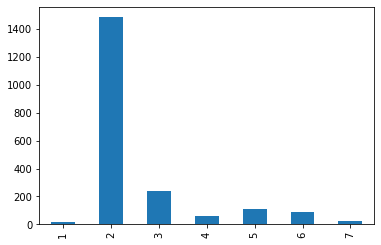

In [4]:
## Usia responden
## < 15 tahun	15-20 tahun	21-30 tahun	31-40 tahun	41-50 tahun	>50 tahun

dfUsia = pd.DataFrame({'Usia': Usia})
Usia.value_counts(sort = False).plot(kind = 'bar')

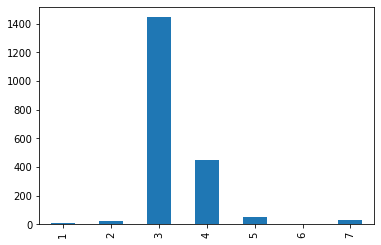

In [5]:
## Pendidikan terakhir responden
## SD	SMP	SMA	S1	S2	S3

dfPendidikan = pd.DataFrame({'Pendidikan': Pendidikan})
Pendidikan.value_counts(sort = False).plot(kind = 'bar')

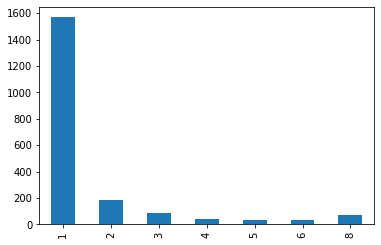

In [6]:
## Pekerjaan responden
## Pelajar / Mahasiswa	Karyawan Swasta	Ibu Rumah Tangga	Pegawai Negeri	Profesi ( Dokter, Dosen, Pengacara, dll)	Pengusaha	Lainnya, sebutkan

dfPekerjaan = pd.DataFrame({'Pekerjaan': Pekerjaan})
Pekerjaan.value_counts(sort = False).plot(kind = 'bar')

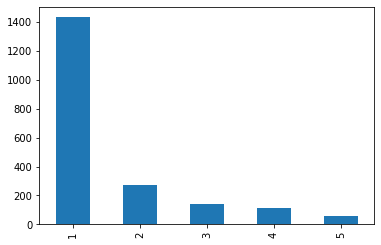

In [7]:
## Penghasilan responden
## < Rp 2 juta	Rp 2 juta â€“ Rp 5 juta	Rp 5 juta â€“ Rp 10 juta	> Rp 10 juta

dfPenghasilan = pd.DataFrame({'Penghasilan': Penghasilan})
Penghasilan.value_counts(sort = False).plot(kind = 'bar')

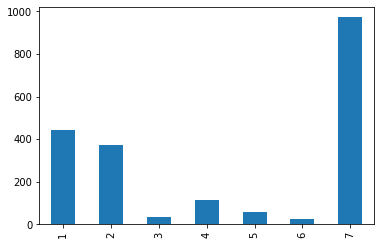

In [8]:
## Domisili responden
## Jakarta	Bandung	Yogyakarta	Tangerang	Surabaya	Bali	Lainnya, mohon sebutkan

Domisili = CleanColumn(df, 7, 30)

dfDomisili = pd.DataFrame({'Domisili': Domisili})
Domisili.value_counts(sort = False).plot(kind = 'bar')

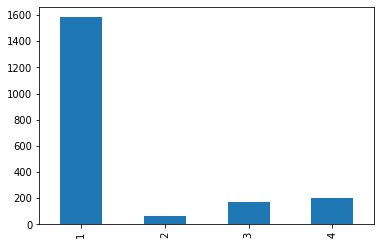

In [9]:
## Peningkatan Aktivitas di Internet (1 = Iya, 2 = Tidak, 3 = Sama, 4 = NaN)
## Ya	Tidak	Sama saja
    
AktifOnline = CleanColumn(df, 4, 37)

Aktivitas = pd.DataFrame({"Aktivitas": AktifOnline})
AktifOnline.value_counts(sort = False).plot(kind = 'bar')

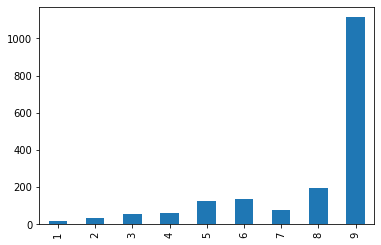

In [235]:
## Waktu yang dihabiskan online
## 1 jam	2 jam	3 jam	4 jam	5 jam	6 jam	7 jam	8 jam	> 8 jam

JamOnline = pd.DataFrame({"Jam Online": CleanColumn(df, 10, 40)})
JamOn = JamOnline.loc[:, "Jam Online"].value_counts(sort = False).drop(10)
JamOn.plot(kind = 'bar')

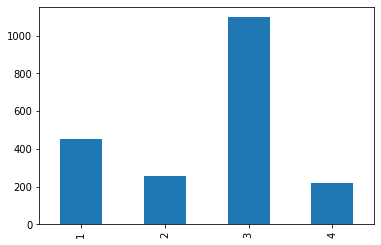

In [11]:
## Akses/Provider Internet
## Menggunakan Mobile Data	Menggunakan Broadband	Menggunakan broadband dan mobile data

AksesInet = pd.DataFrame({'Metode Akses': CleanColumn(df, 4, 49)})
Akses = AksesInet.loc[:, 'Metode Akses'].value_counts(sort = False)
Akses.plot(kind = 'bar')

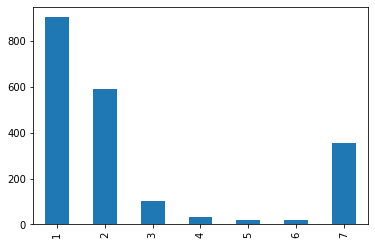

In [12]:
## Pengeluaran untuk mobile data
## Mobile data - < Rp 100 ribu	Mobile data - Rp 100 ribu - Rp 200 Ribu	Mobile data - Rp 201 ribu - Rp 300 Ribu	Mobile data - Rp 301 ribu - Rp 400 Ribu	Mobile data - Rp 401 Ribu - Rp 500 Ribu	Mobile data - > Rp 500 Ribu

Mobdat = pd.DataFrame({'Mobile Data': CleanColumn(df, 7, 53)})['Mobile Data'].value_counts(sort = False)
Mobdat.plot(kind = 'bar')

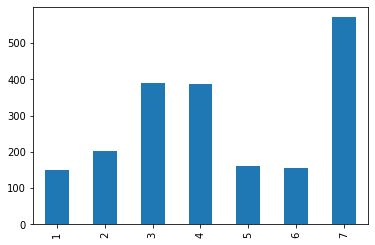

In [13]:
## Pengeluaran untuk broadband/wifi
## Broadband/ Paket wifi - < Rp 100 ribu	Broadband/ Paket wifi - Rp 100 ribu - Rp 200 Ribu	Broadband/ Paket wifi - Rp 201 ribu - Rp 300 Ribu	Broadband/ Paket wifi - Rp 301 ribu - Rp 400 Ribu	Broadband/ Paket wifi - Rp 401 Ribu - Rp 500 Ribu	Broadband/ Paket wifi - > Rp 500 Ribu

Broadband = pd.DataFrame({'Broadband/Wifi': CleanColumn(df, 7, 59)})['Broadband/Wifi'].value_counts(sort = False)
Broadband.plot(kind = 'bar')

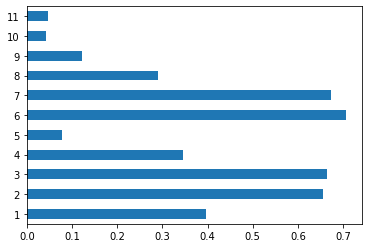

In [14]:
## Aktivitas yang mengalami peningkatan selama 3 bulan terakhir
## Berbelanja online	Streaming video/ film	Melakukan video conference	Delivery Makanan	Mengikuti kelas olahraga secara online	Mengikuti kelas online	Akses media sosial	Game online	Menonton e-sport	Membeli obat-obatan secara online	Melakukan konsultasi kesehatan secara online

Aktivitas = CleanMultiple(df, 12, 65)
Aktivitas.plot(kind = 'barh')

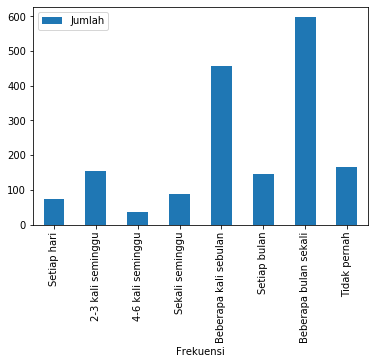

In [15]:
## Intensitas belanja online
## Berbelanja online - Beberapa kali dalam sehari/ setiap hari	Berbelanja online - 2-3 kali seminggu	Berbelanja online - 4-6 kali seminggu	Berbelanja online - sekali seminggu	Berbelanja online - Beberapa kali dalam sebulan	Berbelanja online - setiap bulan	Berbelanja online - Beberapa bulan sekali	Berbelanja online - Tidak pernah

idx = ['Setiap hari', '2-3 kali seminggu', '4-6 kali seminggu', 'Sekali seminggu', 'Beberapa kali sebulan', 'Setiap bulan', 'Beberapa bulan sekali', 'Tidak pernah']
Belanja = (CleanColumn(df, 9, 77)).value_counts(sort = False)
# dfFrekBelanja = dfFrekBelanja.loc[(dfFrekBelanja['Frekuensi'] != 9)] # hilangkan NaN
dfBelanja = pd.DataFrame({'Jumlah': Belanja.drop(9), 'Frekuensi': idx}).set_index('Frekuensi')
dfBelanja.plot(kind = 'bar')

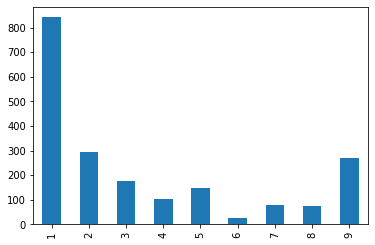

In [16]:
## Intensitas streaming video/film
## Streaming video/ film - Beberapa kali dalam sehari/ setiap hari	Streaming video/ film - 2-3 kali seminggu	Streaming video/ film - 4-6 kali seminggu	Streaming video/ film - sekali seminggu	Streaming video/ film - Beberapa kali dalam sebulan	Streaming video/ film - setiap bulan	Streaming video/ film - Beberapa bulan sekali	Streaming video/ film - Tidak pernah

Streaming = pd.DataFrame({'Streaming': CleanColumn(df, 9, 85)})['Streaming'].value_counts(sort = False)
Streaming.plot(kind = 'bar')

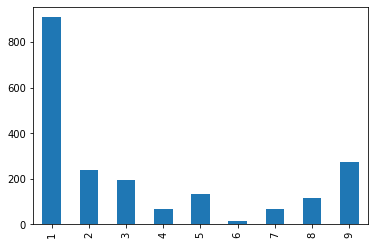

In [17]:
## Intensitas vidcon 
## Melakukan video conference - Beberapa kali dalam sehari/ setiap hari	Melakukan video conference - 2-3 kali seminggu	Melakukan video conference - 4-6 kali seminggu	Melakukan video conference - sekali seminggu	Melakukan video conference - Beberapa kali dalam sebulan	Melakukan video conference - setiap bulan	Melakukan video conference - Beberapa bulan sekali	Melakukan video conference - Tidak pernah

Vidcon = pd.DataFrame({'Vidcon': CleanColumn(df, 9, 93)})['Vidcon'].value_counts(sort = False)
Vidcon.plot(kind = 'bar')

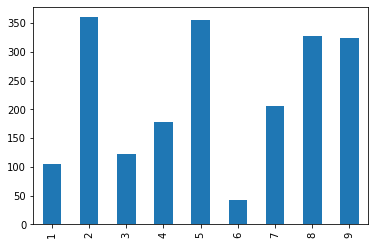

In [18]:
## Intensitas delivery makanan
## Delivery Makanan - Beberapa kali dalam sehari/ setiap hari	Delivery Makanan - 2-3 kali seminggu	Delivery Makanan - 4-6 kali seminggu	Delivery Makanan - sekali seminggu	Delivery Makanan - Beberapa kali dalam sebulan	Delivery Makanan - setiap bulan	Delivery Makanan - Beberapa bulan sekali	Delivery Makanan - Tidak pernah

DelMak = pd.DataFrame({'Delmak': CleanColumn(df, 9, 101)})['Delmak'].value_counts(sort = False)
DelMak.plot(kind = 'bar')

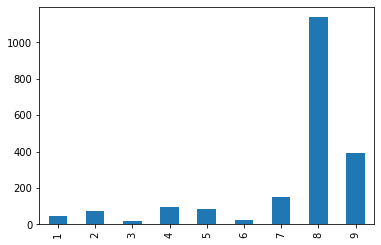

In [19]:
## Intensitas Kelas Olahraga
## Mengikuti kelas olahraga secara online - Beberapa kali dalam sehari/ setiap hari	Mengikuti kelas olahraga secara online - 2-3 kali seminggu	Mengikuti kelas olahraga secara online - 4-6 kali seminggu	Mengikuti kelas olahraga secara online - sekali seminggu	Mengikuti kelas olahraga secara online - Beberapa kali dalam sebulan	Mengikuti kelas olahraga secara online - setiap bulan	Mengikuti kelas olahraga secara online - Beberapa bulan sekali	Mengikuti kelas olahraga secara online - Tidak pernah

KelOr = pd.DataFrame({'KelOr': CleanColumn(df, 9, 109)})['KelOr'].value_counts(sort = False)
KelOr.plot(kind = 'bar')

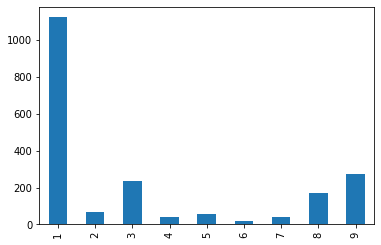

In [20]:
## Intensitas Kelas Online
## Mengikuti kelas online - Beberapa kali dalam sehari/ setiap hari	Mengikuti kelas online - 2-3 kali seminggu	Mengikuti kelas online - 4-6 kali seminggu	Mengikuti kelas online - sekali seminggu	Mengikuti kelas online - Beberapa kali dalam sebulan	Mengikuti kelas online - setiap bulan	Mengikuti kelas online - Beberapa bulan sekali	Mengikuti kelas online - Tidak pernah

KelOn = pd.DataFrame({'KelOn': CleanColumn(df, 9, 117)})['KelOn'].value_counts(sort = False)
KelOn.plot(kind = 'bar')

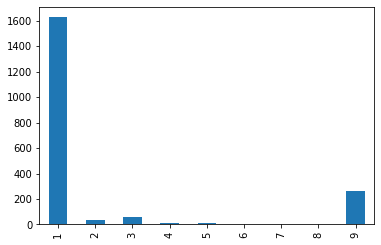

In [21]:
## Intensitas Media Sosial
## Akses media sosial - Beberapa kali dalam sehari/ setiap hari	Akses media sosial - 2-3 kali seminggu	Akses media sosial - 4-6 kali seminggu	Akses media sosial - sekali seminggu	Akses media sosial - Beberapa kali dalam sebulan	Akses media sosial - setiap bulan	Akses media sosial - Beberapa bulan sekali	Akses media sosial - Tidak pernah

MedSos = pd.DataFrame({'MedSos': CleanColumn(df, 9, 125)})['MedSos'].value_counts(sort = False)
MedSos.plot(kind = 'bar')

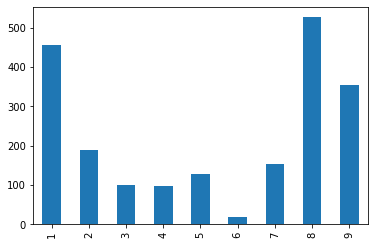

In [22]:
## Intensitas Game Online
## Game online - Beberapa kali dalam sehari/ setiap hari	Game online - 2-3 kali seminggu	Game online - 4-6 kali seminggu	Game online - sekali seminggu	Game online - Beberapa kali dalam sebulan	Game online - setiap bulan	Game online - Beberapa bulan sekali	Game online - Tidak pernah

GameOn = pd.DataFrame({'GameOn': CleanColumn(df, 9, 133)})['GameOn'].value_counts(sort = False)
GameOn.plot(kind = 'bar')

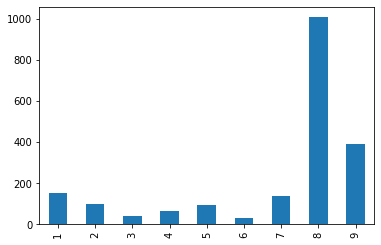

In [23]:
## Intensitas Menonton Esport
## Menonton e-sport - Beberapa kali dalam sehari/ setiap hari	Menonton e-sport - 2-3 kali seminggu	Menonton e-sport - 4-6 kali seminggu	Menonton e-sport - sekali seminggu	Menonton e-sport - Beberapa kali dalam sebulan	Menonton e-sport - setiap bulan	Menonton e-sport - Beberapa bulan sekali	Menonton e-sport - Tidak pernah

Esport = pd.DataFrame({'Esport': CleanColumn(df, 9, 141)})['Esport'].value_counts(sort = False)
Esport.plot(kind = 'bar')

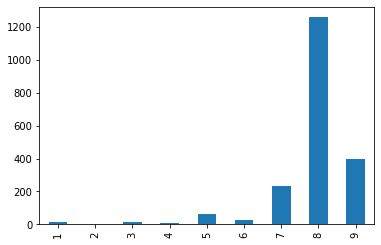

In [24]:
## Intensitas Membeli Obat-obatan Online
## Membeli obat-obatan secara online - Beberapa kali dalam sehari/ setiap hari	Membeli obat-obatan secara online - 2-3 kali seminggu	Membeli obat-obatan secara online - 4-6 kali seminggu	Membeli obat-obatan secara online - sekali seminggu	Membeli obat-obatan secara online - Beberapa kali dalam sebulan	Membeli obat-obatan secara online - setiap bulan	Membeli obat-obatan secara online - Beberapa bulan sekali	Membeli obat-obatan secara online - Tidak pernah
    
Obat = pd.DataFrame({'Obat': CleanColumn(df, 9, 149)})['Obat'].value_counts(sort = False)
Obat.plot(kind = 'bar')

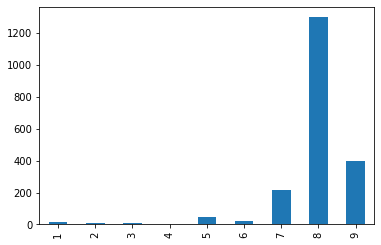

In [25]:
## Intensitas Konsultasi Kesehatan Online
## Melakukan konsultasi kesehatan secara online - Beberapa kali dalam sehari/ setiap hari	Melakukan konsultasi kesehatan secara online - 2-3 kali seminggu	Melakukan konsultasi kesehatan secara online - 4-6 kali seminggu	Melakukan konsultasi kesehatan secara online - sekali seminggu	Melakukan konsultasi kesehatan secara online - Beberapa kali dalam sebulan	Melakukan konsultasi kesehatan secara online - setiap bulan	Melakukan konsultasi kesehatan secara online - Beberapa bulan sekali	Melakukan konsultasi kesehatan secara online - Tidak pernah

Konsul = pd.DataFrame({'Konsul': CleanColumn(df, 9, 157)})['Konsul'].value_counts(sort = False)
Konsul.plot(kind = 'bar')

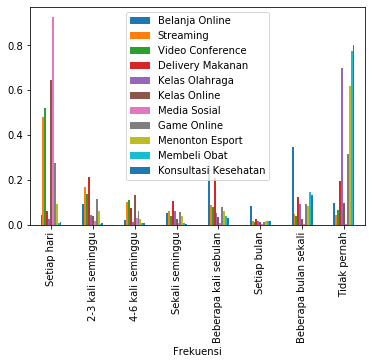

In [26]:
## Intensitas melakukan kegiatan secara online
## 1: beberapa kali sehari/tiap hari, 2: 2-3 kali seminggu, 3: 4-6 kali seminggu, 4: sekali seminggu, 5:  beberapa kali sebulan

Intens = pd.DataFrame({'Belanja Online': Belanja,
                          'Streaming': Streaming,
                          'Video Conference': Vidcon,
                          'Delivery Makanan': DelMak,
                          'Kelas Olahraga': KelOr,
                          'Kelas Online': KelOn,
                          'Media Sosial': MedSos,
                          'Game Online': GameOn,
                          'Menonton Esport': Esport,
                          'Membeli Obat': Obat,
                          'Konsultasi Kesehatan': Konsul
                          }).drop(9)
Intens['Frekuensi'] = idx
Intens= Intens.set_index('Frekuensi')
NormIntens = Intens/Intens.sum()
NormIntens.plot(kind = 'bar')

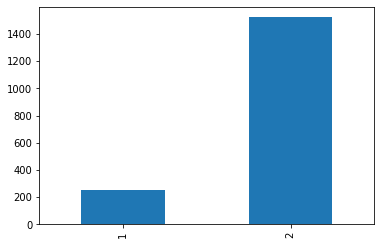

In [27]:
## Bekerja/Belajar Online/Offline
## Offline - Online

OnOffBelajar = pd.DataFrame({'OnOffBelajar': CleanColumn(df, 3, 165)})['OnOffBelajar'].value_counts(sort = False)
OnOffBelajar.drop(3).plot(kind = 'bar')

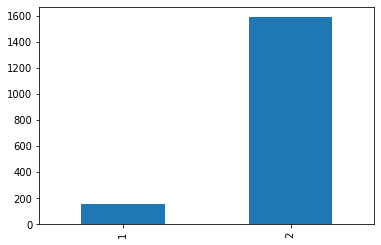

In [28]:
## Meeting Online/Offline
## Offline - Online

OnOffMeeting = pd.DataFrame({'OnOffMeeting': CleanColumn(df, 3, 167)})['OnOffMeeting'].value_counts(sort = False)
OnOffMeeting.drop(3).plot(kind = 'bar')

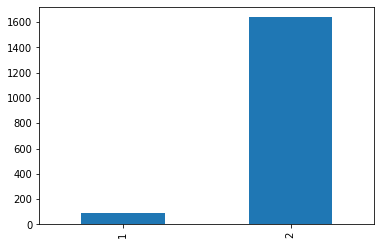

In [29]:
## Workshop Online/Offline
## Offline - Online 

OnOffWorkshop = pd.DataFrame({'OnOffWorkshop': CleanColumn(df, 3, 169)})['OnOffWorkshop'].value_counts(sort = False)
OnOffWorkshop.drop(3).plot(kind = 'bar')

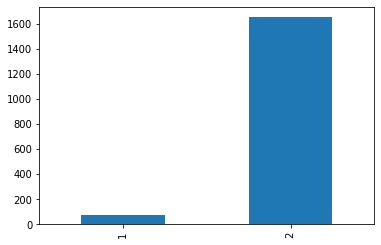

In [30]:
## Film Online/Offline
## Offline - Online

OnOffFilm = pd.DataFrame({'OnOffFilm': CleanColumn(df, 3, 171)})['OnOffFilm'].value_counts(sort = False)
OnOffFilm.drop(3).plot(kind = 'bar')

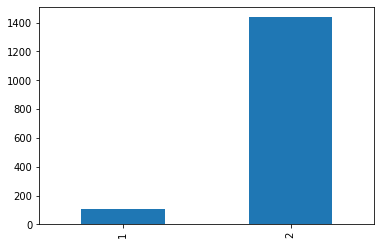

In [31]:
## Konser Online/Offline
## Offline - Online

OnOffKonser = pd.DataFrame({'OnOffKonser': CleanColumn(df, 3, 173)})['OnOffKonser'].value_counts(sort = False)
OnOffKonser.drop(3).plot(kind = 'bar')

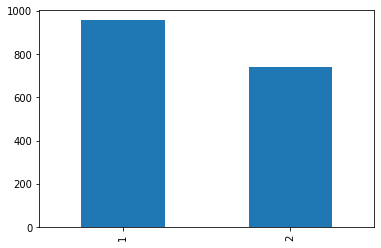

In [32]:
## Gathering Online/Offline
## Offline - Online

OnOffGath = pd.DataFrame({'OnOffGath': CleanColumn(df, 3, 175)})['OnOffGath'].value_counts(sort = False)
OnOffGath.drop(3).plot(kind = 'bar')

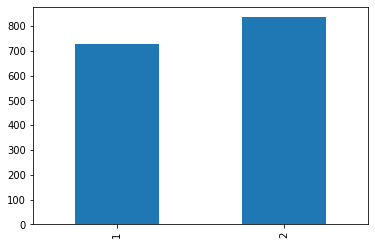

In [33]:
## Konsul Kesehatan Online/Offline
## Offline - Online

OnOffKonsul = pd.DataFrame({'OnOffKonsul': CleanColumn(df, 3, 177)})['OnOffKonsul'].value_counts(sort = False)
OnOffKonsul.drop(3).plot(kind = 'bar')

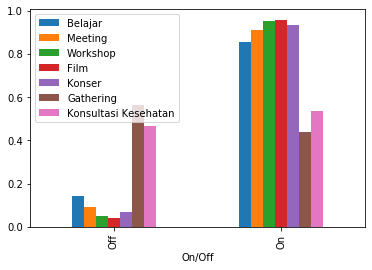

In [34]:
## Dalam melakukan kegiatan, offline atau online
## 1: Offline, 2: Online

OnOff = pd.DataFrame({'Belajar': OnOffBelajar,
                     'Meeting': OnOffMeeting,
                     'Workshop': OnOffWorkshop,
                     'Film': OnOffFilm,
                     'Konser': OnOffKonser,
                     'Gathering': OnOffGath,
                     'Konsultasi Kesehatan': OnOffKonsul})
OnOff['On/Off'] = ['Off', 'On', 'NaN']
OnOff = OnOff.set_index('On/Off')
NormOnOff = OnOff.drop('NaN')/OnOff.drop('NaN').sum()
NormOnOff.plot(kind = 'bar')

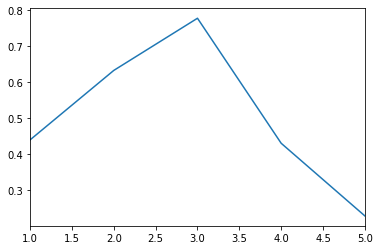

In [35]:
## Media komunikasi yang paling sering digunakan
## 1: email, 2:chatting, 3: conference call (video/ audio), 4: video streaming, 5: web download, 6: Lainnya, sebutkan

StartCol = 179
NaN = 6
Out = pd.Series([0.0 for i in range(1, NaN)], index = range(1,NaN))
for i in range(NaN-1):
    Out[i+1] = pd.Series([df.iloc[:, StartCol+i].value_counts(dropna= False, normalize = True)[i+1]])

MedKom = CleanMultiple(df, NaN, StartCol)
MedKom.plot()

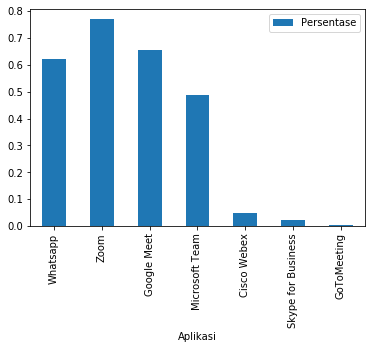

In [36]:
## Aplikasi yang biasa digunakan saat WFH
# Whatsapp	Zoom	Google Meet	Microsoft Team	Cisco Webex	Skype for Business	GoToMeeting

AplikasiWFH = pd.DataFrame({'Persentase': CleanMultiple(df, 8, 185), 'Aplikasi': ['Whatsapp','Zoom','Google Meet','Microsoft Team', 'Cisco Webex', 'Skype for Business', 'GoToMeeting']})
AplikasiWFH.set_index('Aplikasi').plot(kind = 'bar')

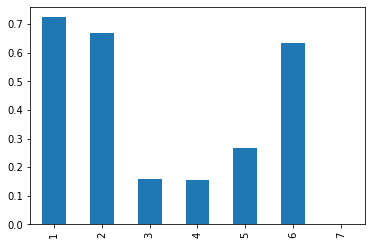

In [37]:
## Alasan menggunakan aplikasi tersebut
## Mudah digunakan	Digunakan banyak orang	Hemat kuota/ bandwidth	Lebih aman	Durasi panggilan tanpa batas	Telah ditentukan oleh perusahaan atau pihak yang lebih berwenang	Lainnya, sebutkan

Alasan = CleanMultiple(df, 8, 193)
Alasan.plot(kind = 'bar')

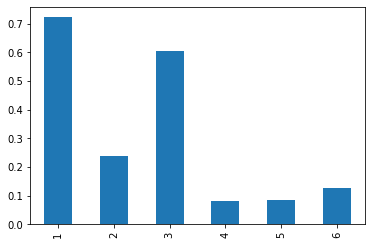

In [38]:
## Penggunaan layanan bank
## ATM	Internet Banking	Mobile Banking	SMS Banking	Kartu Kredit	Datang ke Kantor Cabang

LayBank = CleanMultiple(df, 7, 200)
LayBank.plot(kind = 'bar')

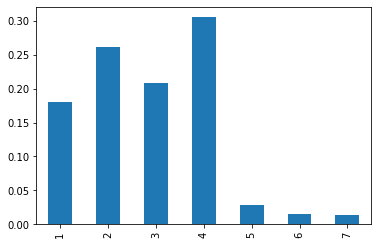

In [39]:
## Penggunaan layanan ATM
## ATM - Bank BRI	ATM - Bank BNI	ATM - Bank Mandiri	ATM - Bank BCA	ATM - Bank CIMB Niaga	ATM - Bank BTN	ATM - Bank Permata
Bank = ['BRI', 'BNI', 'Mandiri', 'BCA', 'CIMB Niaga', 'BTN', 'Permata']
# LayATM = pd.DataFrame({'Frekuensi': CleanMultiple(df, 8, 206), 'Bank': Bank}).set_index('Bank')
LayATM = CleanMultiple(df, 8, 206)
LayATM.plot(kind = 'bar')

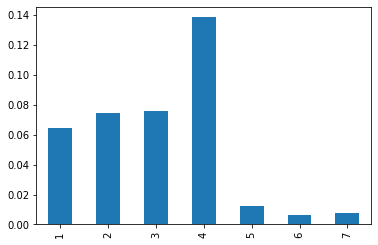

In [40]:
## Penggunaan layanan E-banking
## Internet Banking - Bank BRI	Internet Banking - Bank BNI	Internet Banking - Bank Mandiri	Internet Banking - Bank BCA	Internet Banking - Bank CIMB Niaga	Internet Banking - Bank BTN	Internet Banking - Bank Permata

LayEbank = CleanMultiple(df, 8, 213)
LayEbank.plot(kind = 'bar')

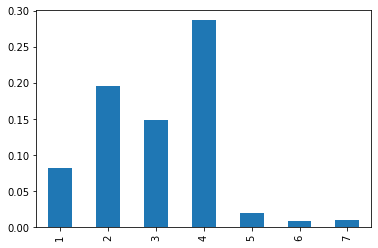

In [41]:
## Penggunaan layanan M-banking
## Mobile Banking - Bank BRI	Mobile Banking - Bank BNI	Mobile Banking - Bank Mandiri	Mobile Banking - Bank BCA	Mobile Banking - Bank CIMB Niaga	Mobile Banking - Bank BTN	Mobile Banking - Bank Permata

LayMbank = CleanMultiple(df, 8, 220)
LayMbank.plot(kind = 'bar')

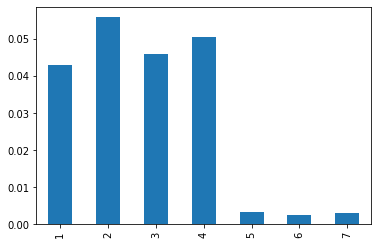

In [42]:
## Penggunaan layanan SMS-banking
## SMS Banking - Bank BRI	SMS Banking - Bank BNI	SMS Banking - Bank Mandiri	SMS Banking - Bank BCA	SMS Banking - Bank CIMB Niaga	SMS Banking - Bank BTN	SMS Banking - Bank Permata

LaySMSbank = CleanMultiple(df, 8, 227)
LaySMSbank.plot(kind = 'bar')

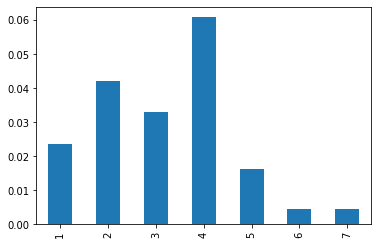

In [43]:
## Penggunaan layanan Kartu Kredit
## Bank BRI	Bank BNI	Bank Mandiri	Bank BCA	Bank CIMB Niaga	Bank BTN	Bank Permata

LayKredit = CleanMultiple(df, 8, 234)
LayKredit.plot(kind = 'bar')

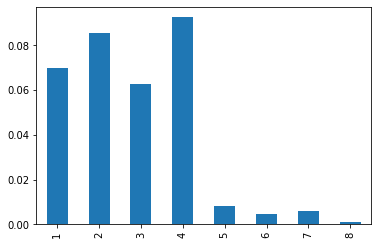

In [44]:
## Penggunaan layanan Kantor Cabang
## Bank BRI	Bank BNI	Bank Mandiri	Bank BCA	Bank CIMB Niaga	Bank BTN	Bank Permata

LayKanCab = CleanMultiple(df, 9, 241)
LayKanCab.plot(kind = 'bar')

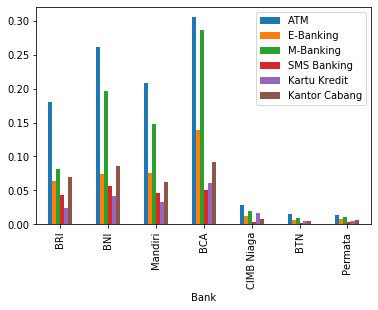

In [211]:
Bank = ['BRI', 'BNI', 'Mandiri', 'BCA', 'CIMB Niaga', 'BTN', 'Permata', 'NaN']
Layanan = pd.DataFrame({'ATM': LayATM, 
                        'E-Banking': LayEbank, 
                        'M-Banking': LayMbank, 
                        'SMS Banking': LaySMSbank, 
                        'Kartu Kredit': LayKredit, 
                        'Kantor Cabang': LayKanCab,
                        'Bank': Bank}).set_index('Bank').drop('NaN')
Layanan.plot(kind = 'bar')

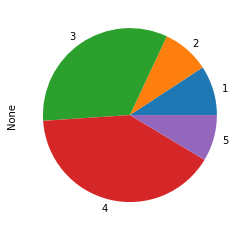

In [46]:
## Frekuensi Penggunaan ATM
## 10 kali per bulan	6-9 kali per bulan	2-5 kali per bulan	Kurang dari/ setidaknya 1 kali per bulan	Tidak Pernah

FrekATM = CleanColumn(df, 6, 249).value_counts(sort = False)
FrekATM.drop(6).plot(kind = 'pie')

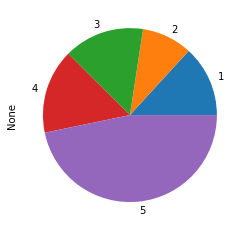

In [47]:
## Frekuensi Penggunaan E-Banking
## 10 kali per bulan	6-9 kali per bulan	2-5 kali per bulan	Kurang dari/ setidaknya 1 kali per bulan	Tidak Pernah

FrekEbank = CleanColumn(df, 6, 254).value_counts(sort = False)
FrekEbank.drop(6).plot(kind = 'pie')

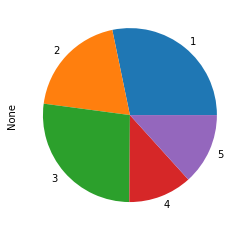

In [48]:
## Frekuensi Penggunaan M-Banking
## 10 kali per bulan	6-9 kali per bulan	2-5 kali per bulan	Kurang dari/ setidaknya 1 kali per bulan	Tidak Pernah

FrekMbank = CleanColumn(df, 6, 259).value_counts(sort = False)
FrekMbank.drop(6).plot(kind = 'pie')

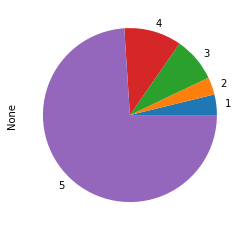

In [49]:
## Frekuensi Penggunaan SMS-Banking
## 10 kali per bulan	6-9 kali per bulan	2-5 kali per bulan	Kurang dari/ setidaknya 1 kali per bulan	Tidak Pernah

FrekSMSbank = CleanColumn(df, 6, 264).value_counts(sort = False)
FrekSMSbank.drop(6).plot(kind = 'pie')

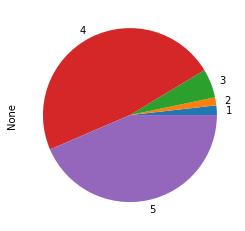

In [50]:
## Frekuensi Penggunaan kantor cabang
## 10 kali per bulan	6-9 kali per bulan	2-5 kali per bulan	Kurang dari/ setidaknya 1 kali per bulan	Tidak Pernah

FrekKanCab = CleanColumn(df, 6, 269).value_counts(sort = False)
FrekKanCab.drop(6).plot(kind = 'pie')

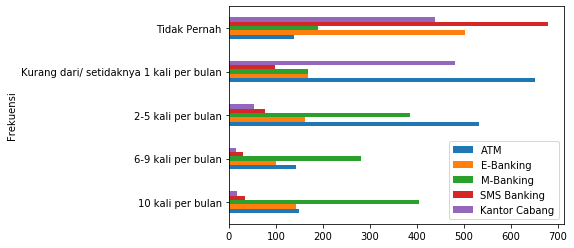

In [209]:
## Frekuensi Penggunaan
Frek = ['10 kali per bulan', 
        '6-9 kali per bulan', 
        '2-5 kali per bulan',
        'Kurang dari/ setidaknya 1 kali per bulan',
        'Tidak Pernah',
        'NaN']

FrekuensiPenggunaan = pd.DataFrame({'ATM': FrekATM, 
                                    'E-Banking': FrekEbank, 
                                    'M-Banking': FrekMbank, 
                                    'SMS Banking': FrekSMSbank, 
                                    'Kantor Cabang': FrekKanCab,
                                    'Frekuensi': Frek}).set_index('Frekuensi').drop('NaN')

FrekuensiPenggunaan.plot(kind = 'barh')

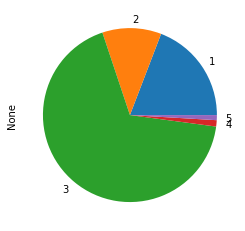

In [52]:
## Layanan yang lebih menarik untuk cek saldo
## ATM	Internet Banking	Mobile Banking	SMS Banking	Datang ke cabang bank

CekSaldo = CleanColumn(df, 6, 274).value_counts(sort = False)
CekSaldo.drop(6).plot(kind = 'pie')

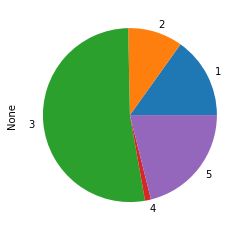

In [53]:
## Layanan yang lebih menarik untuk mutasi rekening
## ATM	Internet Banking	Mobile Banking	SMS Banking	Datang ke cabang bank

Mutasi = CleanColumn(df, 6, 279).value_counts(sort = False)
Mutasi.drop(6).plot(kind = 'pie')

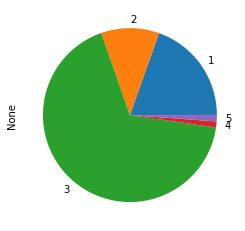

In [54]:
## Layanan yang lebih menarik untuk transfer satu bank
## ATM	Internet Banking	Mobile Banking	SMS Banking	Datang ke cabang bank

Transfer1 = CleanColumn(df, 6, 284).value_counts(sort = False)
Transfer1.drop(6).plot(kind = 'pie')

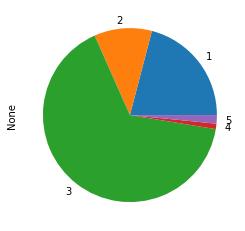

In [55]:
## Layanan yang lebih menarik untuk transfer antar bank
## ATM	Internet Banking	Mobile Banking	SMS Banking	Datang ke cabang bank

Transfer2 = CleanColumn(df, 6, 289).value_counts(sort = False)
Transfer2.drop(6).plot(kind = 'pie')

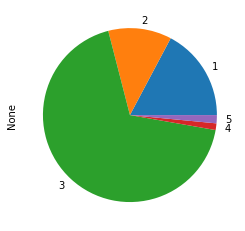

In [56]:
## Layanan yang lebih menarik untuk pembelian pulsa
## ATM	Internet Banking	Mobile Banking	SMS Banking	Datang ke cabang bank

Pulsa = CleanColumn(df, 6, 294).value_counts(sort = False)
Pulsa.drop(6).plot(kind = 'pie')

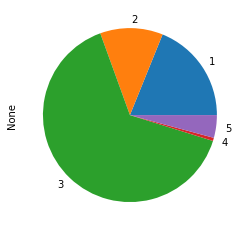

In [57]:
## Layanan yang lebih menarik untuk pembayaran tagihan
## ATM	Internet Banking	Mobile Banking	SMS Banking	Datang ke cabang bank

Tagihan = CleanColumn(df, 6, 299).value_counts(sort = False)
Tagihan.drop(6).plot(kind = 'pie')

,Cek Saldo,Mutasi,Transfer Sama Bank,Transfer Antar Bank,Beli Pulsa,Bayar Tagihan
Preferensi,,,,,,
ATM,0.191676,0.151231,0.195780,0.209261,0.172333,0.188746
E-Banking,0.109613,0.101993,0.107855,0.107268,0.117819,0.116647
M-Banking,0.677608,0.524619,0.673505,0.657679,0.682298,0.646542
SMS Banking,0.011723,0.011137,0.011137,0.009965,0.012309,0.005862
Kantor Cabang,0.009379,0.211020,0.011723,0.015826,0.015240,0.042204


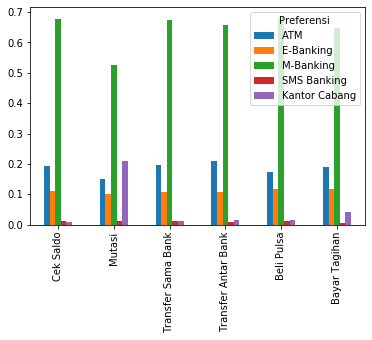

In [123]:
Lay = ['ATM', 
        'E-Banking', 
        'M-Banking', 
        'SMS Banking', 
        'Kantor Cabang',
        'NaN']

LayMenarik = pd.DataFrame({'Cek Saldo': CekSaldo, 
                           'Mutasi': Mutasi, 
                           'Transfer Sama Bank': Transfer1, 
                           'Transfer Antar Bank': Transfer2, 
                           'Beli Pulsa': Pulsa, 
                           'Bayar Tagihan': Tagihan,
                          'Preferensi': Lay}).set_index('Preferensi').drop('NaN')

NormLayMenarik = (LayMenarik/LayMenarik.sum())
NormLayMenarik.T.plot(kind = 'bar')

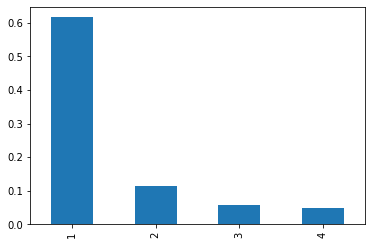

In [59]:
## Keluhan yang dialami saat menggunakan layanan e-channel
## Layanan/ Sistem down	Proses tidak berhasil namun saldo terpotong	Tidak melakukan transaksi tapi saldo terpotong	Transaksi / pembayaran yang sama terjadi dua kali	Lainnya, sebutkan

Keluhan = CleanMultiple(df, 5, 304)
Keluhan.plot(kind = 'bar')

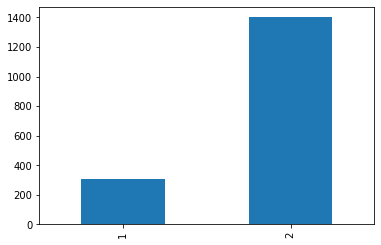

In [60]:
## Pernah mendaftar full online
## Pernah - Tidak Pernah

DaftarOnline = CleanColumn(df, 3, 309).value_counts(sort =False)
DaftarOnline.drop(3).plot(kind= 'bar')

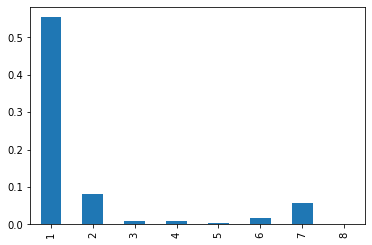

In [61]:
## Jika pernah, apa
## Tidak pernah	Jenius by Bank BTPN	Digibank by Bank DBS	Permata Mobile X by Bank Permata	D-Bank by Bank Danamon	BRIMo by BRI	BCA	Lainnya, mohon sebutkan

TerdaftarDigital = CleanMultiple(df, 9, 311)
TerdaftarDigital.plot(kind = 'bar')

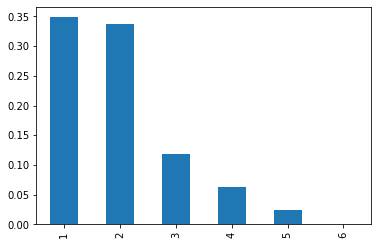

In [62]:
## Alasan menggunakan digital bank
## Tidak memiliki rekening di bank online	kemudahan transaksi	kemudahan pembukaan rekening	promo	karena sedang tren	Lainnya, sebutkan

AlasanDigital = CleanMultiple(df, 7, 319)
AlasanDigital.plot(kind = 'bar')

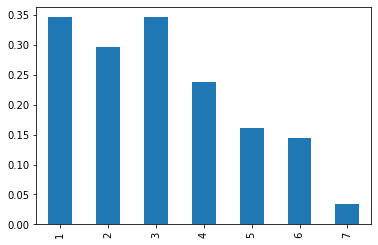

In [63]:
## Fitur paling sering digunakan dalam digital bank
## Tidak memiliki rekening di bank online	Cek Saldo	Transfer	Pembelian Pulsa, eMoney, & voucher-voucher lainnya	Pembayaran Tagihan	Mutasi rekening/ History Transaksi/ Spending Tracker	Deposito	Lainnya, sebutkan

FiturDigital = CleanMultiple(df, 8, 325)
FiturDigital.plot(kind = 'bar')

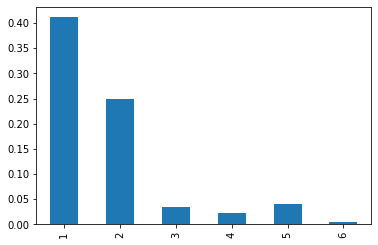

In [64]:
## Kerugian digital bank
## Tidak pernah mengalami keluhan	Sistem Error/ tidak dapat diakses	Transaksi tidak berhasil namun saldo berkurang	Tidak melakukan transaksi tapi saldo berkurang/ ada transaksi	Kesulitan menghubungi customer service	Rekening dihack	Lainnya, Sebutkan

KerugianDigital = CleanMultiple(df, 7, 333)
KerugianDigital.plot(kind = 'bar')

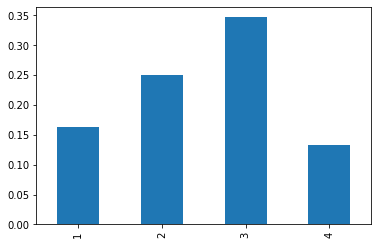

In [65]:
## Alasan tidak membuka rekening bank digita;
## Tidak tahu ada Bank yang menyelenggarakan pembukaan rekening secara online	Tidak tertarik untuk membuka rekening secara online	Rekening Bank milik saya sudah cukup, tidak perlu membuka rekening baru	Tidak merasa aman memiliki bank hanya dengan mendaftar secara online	Lainnya, mohon sebutkan

AlasanTidakDigital = CleanMultiple(df, 5, 340)
AlasanTidakDigital.plot(kind = 'bar')

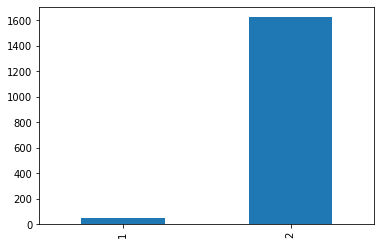

In [66]:
## Pernah daftar kartu kredit secara online
## Pernah - Tidak Pernah

DaftarKredit = CleanColumn(df, 3, 345).value_counts(sort = False)
DaftarKredit.drop(3).plot(kind = 'bar')

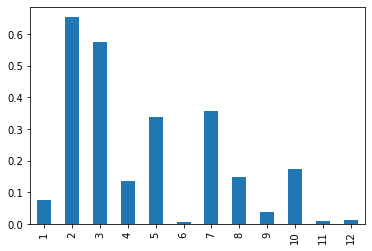

In [67]:
## Penggunaan E-money
## Tidak Menggunakan eMoney	GoPay	OVO	LinkAja	Dana	Paytren	ShopeePay	Flazz BCA	Brizzi	eMoney Mandiri	JakCard	iSaku	Lainnya, mohon sebutkan

Emoney = CleanMultiple(df, 13, 348)
Emoney.plot(kind = 'bar')

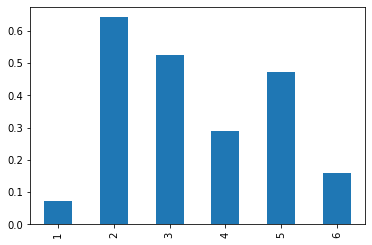

In [68]:
## Alasan penggunaan E-money
## Tidak Menggunakan eMoney	Simple	Efisien secara waktu	Tidak perlu datang ke bank	Promo	Aman	Lainnya (mohon sebutkan)

AlasanEmoney = CleanMultiple(df, 7, 361)
AlasanEmoney.plot(kind = 'bar')

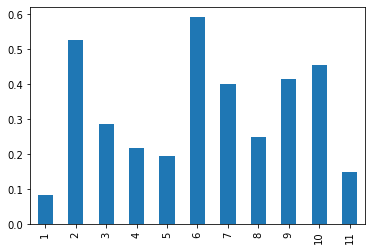

In [69]:
## Keperluan penggunaan E-money
## Tidak Menggunakan eMoney	Pembayaran transportasi online	Pembayaran tol	Pembayaran transportasi umum	Pembayaran tiket parkir	Pembelian delivery makanan	Pembayaran di restauran/ cafe	Pembayaran di minimarket	Pembayaran e-commerce	Pembelian pulsa	Pembayaran utilitas (PLN, PDAM, dll)	Lainnya, sebutkan

KeperluanEmoney = CleanMultiple(df, 12, 368)
KeperluanEmoney.plot(kind = 'bar')

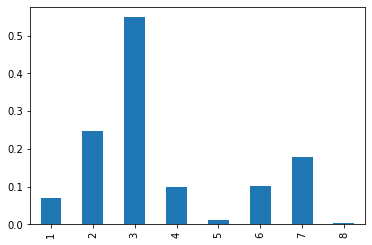

In [70]:
## Bagaimana top up E-money
## Tidak menggunakan eMoney	ATM	Mobile Banking	Internet Banking	SMS Banking	Melalui Driver	Top up di minimarket	Melalui loket PPOB	Lainnya, sebutkan

TopUpEmoney = CleanMultiple(df, 9, 380)
TopUpEmoney.plot(kind = 'bar')

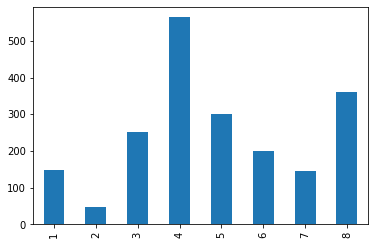

In [71]:
## Nominal Top Up
## Tidak menggunakan eMoney	< Rp 25.000,-	Rp 25.000-Rp 50.000,-	Rp 50.001-Rp 100.000	Rp 100.001-Rp 150.000	Rp 150.001 â€“ Rp 300.000	> Rp 300.000

NominalTopUp = CleanColumn(df, 8, 389).value_counts(sort = False)
NominalTopUp.plot(kind = 'bar')

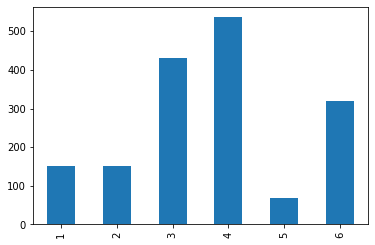

In [72]:
## Frekuensi Top Up
## Tidak menggunakan eMoney	Sangat Sering (beberapa kali dalam seminggu)	Sering (kurang lebih 1 kali seminggu)	Jarang (kurang lebih 1 kali sebulan)	Sangat jarang	Hanya mengisi jika akan menggunakan

FrekTopUp = CleanColumn(df, 7, 396).value_counts(sort = False)
FrekTopUp.drop(7).plot(kind = 'bar')

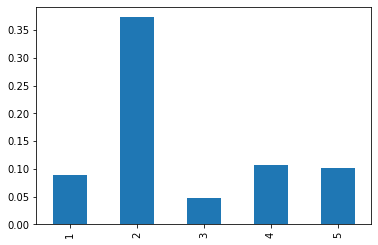

In [73]:
## Kendala layanan E money
## Tidak menggunakan layanan eMoney	Aplikasi tidak bisa digunakan/ diakses	Nominal saldo berkurang tanpa digunakan untuk transaksi	Telah Top Up tapi saldo tidak bertambah	Kartu eMoney tidak terdeteksi	Lainnya, sebutkan

KendalaEmoney = CleanMultiple(df, 6, 402)
KendalaEmoney.plot(kind = 'bar')

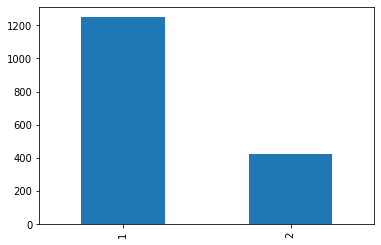

In [74]:
## Pernah melakukan pembayaran menggunakan QR code
## Pernah - Tidak pernah

QRcode = CleanColumn(df, 3, 408).value_counts(sort = False)
QRcode.drop(3).plot(kind = 'bar')

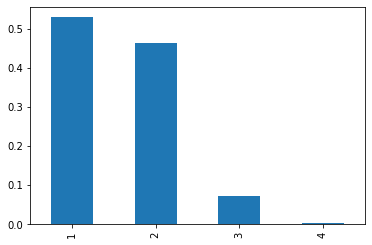

In [75]:
## Pernah menggunakan layanan QR code apa
## GoPay	OVO	LinkAja	Paytren	Lainnya, sebutkan

LayananQR = CleanMultiple(df, 5, 410)
LayananQR.plot(kind ='bar')

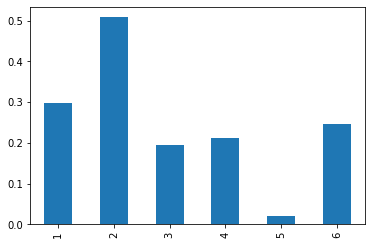

In [76]:
## Menggunakan layanan QR dimana
## Mini market	Cafe/Â  restaurant	Pedagang kaki lima / warung-warung pinggir jalan	Tempat hiburan/ rekreasi (seperti bioskop, game master, dll)	Pasar tradisional	Supermarket/ Mall	Lainnya, sebutkan

LokasiQR = CleanMultiple(df, 7, 415)
LokasiQR.plot(kind = 'bar')

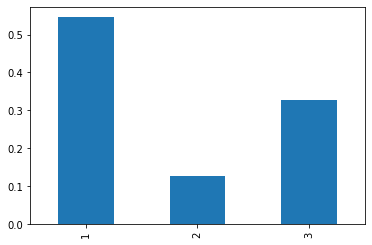

In [77]:
## Frekuensi belanja online dalam 6 bulan terakhir
## Meningkat - Menurun - Tetap

FrekBelanja = CleanColumn(df, 4, 422).value_counts(sort = False)
normFrekBelanja = FrekBelanja.drop(4)/FrekBelanja.drop(4).sum()
normFrekBelanja.plot(kind = 'bar')


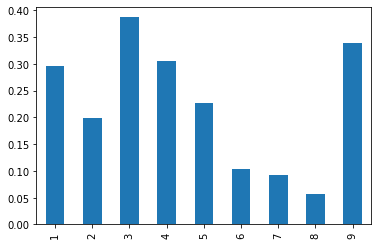

In [78]:
## Belanja online yang mengalami peningkatan
## BelanjaÂ fashion & mode secara online	Belanja groceries / keperluan sehari-hari secara online	Membeli makanan dan minuman secara online	Belanja buku, hobi & koleksi secara online	Belanja kosmetik & alat kecantikan/ perawatan badan secara online	Belanja handphone, laptop/ komputer secara online	Booking transportasi jarak jauh kereta api/ pesawat secara online	Booking Hotel secara online	Pembelian pulsa secara online	Belanja online lainnya, tolong sebutkan

PeningkatanBelanja = CleanMultiple(df, 10, 425)
PeningkatanBelanja.plot(kind= 'bar')

In [160]:
## Kecenderungan Belanja
## Online - Offline
Out = pd.DataFrame()
for i in range (436, 464, 2):
    Out[i] = CleanColumn(df, 3, i-1).value_counts(sort = False).drop(3)
Out = Out.T
Out['Belanja'] = ['fashion', 
                     'groceries', 
                     'hp', 
                     'laptop', 
                     'alat elektrik', 
                     'kosmetik', 
                     'buku', 
                     'pulsa', 
                     'makanan', 
                     'pesawat', 
                     'kereta', 
                     'hotel', 
                     'bioskop', 
                     'wisata']

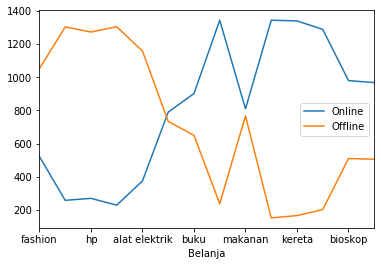

In [194]:
## fashion, groceries, hp, laptop, alat elektrik, kosmetik, buku, pulsa, makanan, pesawat, kereta, hotel, bioskop, wisata
Kegunaan = Out.set_index('Belanja').rename(columns = {1: 'Online', 2: 'Offline'})
Kegunaan.plot()

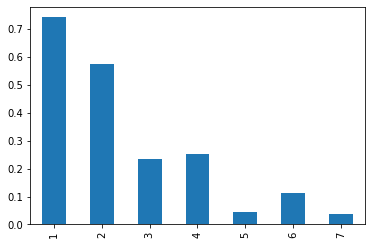

In [81]:
## Lokasi berbelanja online
## Marketplace (seperti Lazada, Tokopedia, Bukalapak, dan sejenisnya)	Jasa Layanan Delivery Online (seperti Happyfresh, GoFood- GoJek, GoMart-Gojek, klik-eat.com dan sejenisnya)	Website toko online	Instagram	Line	Whatsapp	Facebook	Lainnya, sebutkan

LokBelanja = CleanMultiple(df, 8, 463)
LokBelanja.plot(kind = 'bar')

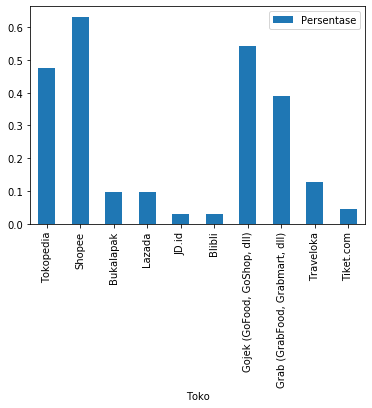

In [82]:
## Toko Online Favorit
## Tokopedia	Shopee	Bukalapak	Lazada	JD.id	Blibli	Gojek (GoFood, GoShop, dll)	Grab (GrabFood, Grabmart, dll)	Traveloka	Tiket.com	Lainnya, mohon sebutkan

Toko = ['Tokopedia',
        'Shopee',
        'Bukalapak',
        'Lazada',
        'JD.id',
        'Blibli',
        'Gojek (GoFood, GoShop, dll)',
        'Grab (GrabFood, Grabmart, dll)',
        'Traveloka',
        'Tiket.com']
TokoFav = pd.DataFrame({'Persentase': CleanMultiple(df, 11, 471),
                         'Toko': Toko}).set_index('Toko')
TokoFav.plot(kind = 'bar')


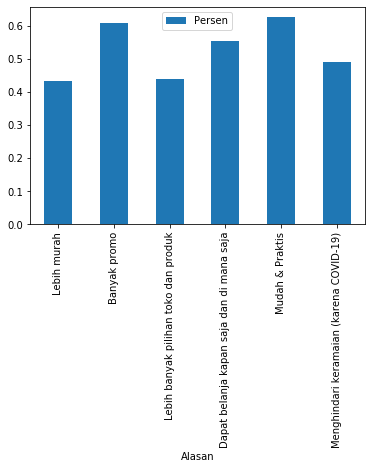

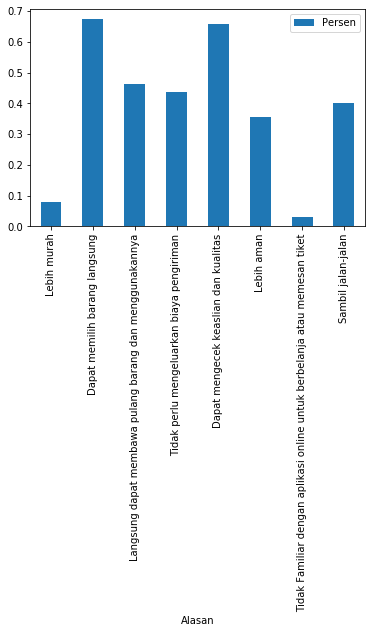

In [83]:
## Alasan berbelanja online/offline
## Lebih murah	Banyak promo	Lebih banyak pilihan toko dan produk	Dapat belanja kapan saja dan di mana saja	Mudah & Praktis	Menghindari keramaian (karena COVID-19)	Lainnya, sebutkan
## Lebih murah	Dapat memilih barang langsung	Langsung dapat membawa pulang barang dan menggunakannya	Tidak perlu mengeluarkan biaya pengiriman	Dapat mengecek keaslian dan kualitas	Lebih aman	Tidak Familiar dengan aplikasi online untuk berbelanja atau memesan tiket	Sambil jalan-jalan	Lainnya, mohon sebutkan

OnFav = CleanMultiple(df, 7, 482)
OffFav = CleanMultiple(df, 9, 489)
AlasanOn = ['Lebih murah',
            'Banyak promo',
            'Lebih banyak pilihan toko dan produk',
            'Dapat belanja kapan saja dan di mana saja',
            'Mudah & Praktis',
            'Menghindari keramaian (karena COVID-19)']
AlasanOff = ['Lebih murah',
          'Dapat memilih barang langsung',
          'Langsung dapat membawa pulang barang dan menggunakannya',
          'Tidak perlu mengeluarkan biaya pengiriman',
          'Dapat mengecek keaslian dan kualitas',
          'Lebih aman',
          'Tidak Familiar dengan aplikasi online untuk berbelanja atau memesan tiket',
          'Sambil jalan-jalan']

dfOnFav = pd.DataFrame({'Persen': OnFav, 'Alasan': AlasanOn}).set_index('Alasan')
dfOffFav = pd.DataFrame({'Persen': OffFav, 'Alasan': AlasanOff}).set_index('Alasan')
dfOnFav.plot(kind = 'bar')
dfOffFav.plot(kind = 'bar')

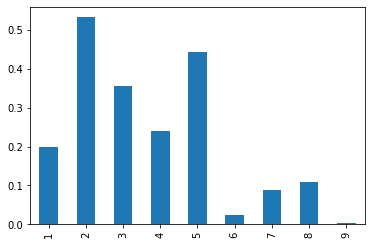

In [84]:
## Pembayaran saat belanja online
## COD (Cash on Delivery)	Transfer via Virtual Account	Transfer ke rekening bank melalui SMS/Mobile Banking atau Internet Banking	Transfer via ATM	melalui eMoney atau eWallet milik marketplace (seperti shopeepay, dana, OVO, dll)	menggunakan fitur Paylater	Kartu Kredit / Debit Online	Melalui minimarket	Melalui layanan fintech credit loan (seperti kredivo, akulaku, dll)	Lainnya, sebutkan

Pembayaran = CleanMultiple(df, 10, 498)
Pembayaran.plot(kind = 'bar')

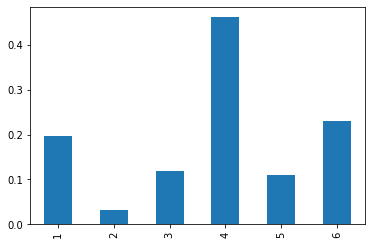

In [85]:
## Kendala pembayaran online
## Pembayaran sudah dilakukan, tetapi barang ternyata tidak tersedia	Saldo eMoney/ eWallet berkurang tanpa melakukan transaksi	Pembayaran telah dilakukan tetapi tidak terdeteksi/ terkonfirmasi	Barang yang diperoleh tidak sesuai dengan spesifikasi/ tampilan di situs	Jumlah barang yang diterima kurang	Barang rusak/ salah tetapi tidak dapat dikembalikan	Lainnya, mohon sebutkan

KendalaBayar = CleanMultiple(df, 7, 508)
KendalaBayar.plot(kind = 'bar')

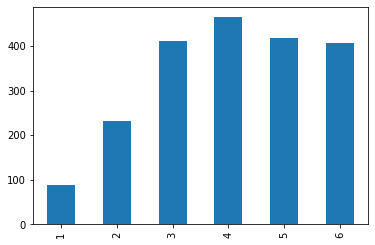

In [86]:
## Frekuensi belanja online sosmed
## Sangat Sering (> 5 kali sebulan)	Sering (2-5 kali sebulan)	Jarang (kurang lebih 1 kali sebulan)	Sangat jarang	Tidak Pernah

FrekBelanjaSosmed = CleanColumn(df, 6, 515).value_counts(sort = False)
FrekBelanjaSosmed.plot(kind = 'bar')

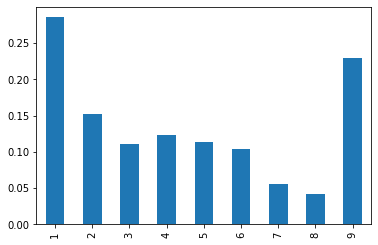

In [87]:
## ALasan belanja lewat sosmed
## Tidak Pernah	Barang lebih beragam	Lebih murah	Lebih mudah	Lebih banyak promo	Bisa customize	Bisa CoD	Kualitas barang terjamin	Barang hanya dijual melalui social media	Lainnya, mohon sebutkan

AlasanSosmed = CleanMultiple(df, 10, 520)
AlasanSosmed.plot(kind = 'bar')

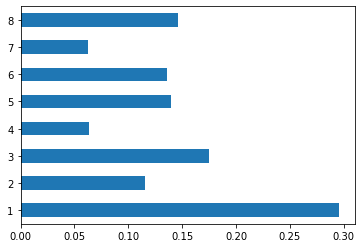

In [88]:
## Kendala belanja lewat sosmed
## Tidak pernah mendapat pengalaman tidak menyenangkan	Penjual online ternyata penipu	Barang yang dikirim tidak sesuai dengan gambar di sosial media	Sudah transfer tapi barang tidak dikirim	Ketika mau membeli, barang sudah "sold out"	Penjual susah dihubungi	Barang yang diperoleh ternyata palsu/ tidak original	Pengiriman lama	Lainnya, sebutkan

KendalaSosmed = CleanMultiple(df, 9, 530)
KendalaSosmed.plot(kind = 'barh')

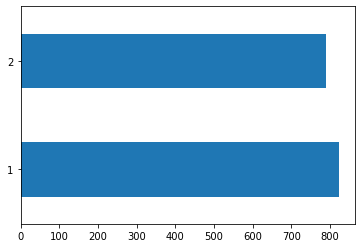

In [89]:
## Mengenal fintech 
## Ya Tahu	Tidak Tahu

KenalFintech = CleanColumn(df, 3, 539).value_counts(sort = False, normalize = False).drop(3)
KenalFintech.plot(kind = 'barh')

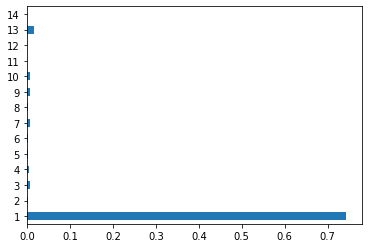

In [90]:
## Fintech yang pernah digunakan
## Tidak pernah menggunakan fintech lending	Danamas	Koinworks	Amartha	Investree	Modalku	Danacepat	Akseleran	Akulaku	CIcil	Uangteman	Taralite	Kredivo	AwanTunai	Crowdo	Lainnya, mohon sebutkan

Fint = CleanMultiple(df, 15, 542)
Fint.plot(kind = 'barh')

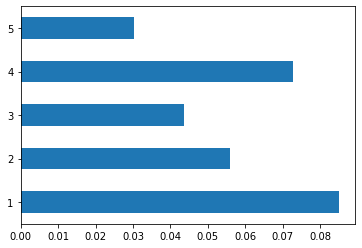

In [91]:
## Alasan meminjam lewat fintech lending
## Persyaratan mudah	Proses pendaftaran dan pengajuan cepat	Proses pencairan cepat dan mudah	Tidak memerlukan jaminan	Hanya memerlukan uang dalam jumlah sedikit	Lainnya, sebutkan

FintLend = CleanMultiple(df, 6, 558)
FintLend.plot(kind = 'barh')

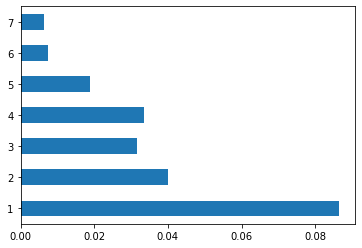

In [92]:
## Alasan mengajukan pinjaman
## Saya tidak mengajukan pinjaman, tetapi memberikan dana pinjaman	Modal Usaha	Keperluan sehari-hari	Pembelanjaan di marketplace (online shop)	Pembiayaan pendidikan	Pembelian kendaraan	Berlibur	Lainnya, sebutkan

AlasanLend = CleanMultiple(df, 8, 564)
AlasanLend.plot(kind = 'barh')

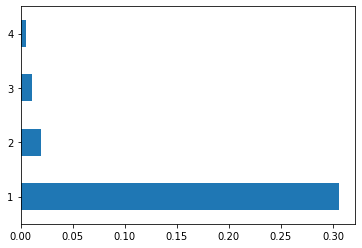

In [93]:
## Nominal peminjaman fintech lending
## < Rp 1.000.000,-	Rp 1.000.000 â€“ Rp 5.000.000,-	Rp 5.000.001 â€“ Rp 10.000.000	> Rp 10.000.000,-

Nominal = CleanMultiple(df, 5, 572)
Nominal.plot(kind = 'barh')

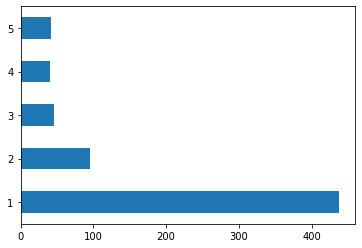

In [94]:
## Lama proses peminjaman hingga cair
## < 1 jam	1 jam - 3 jam	3 jam - 1 hari	1 - 3 hari	>3 hari

Pencairan = CleanColumn(df, 6, 576).value_counts(sort = False).drop(6)
Pencairan.plot(kind = 'barh')

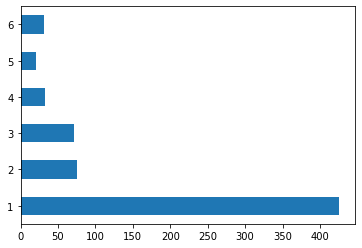

In [95]:
## Lama peminjaman 
## < 15 hari	16 hari - 1 bulan	1 - 3 bulan	3 - 6 bulan	6 bulan - 1 tahun	> 1 tahun

Jangka = CleanColumn(df, 7, 581).value_counts(sort = False).drop(7)
Jangka.plot(kind = 'barh')

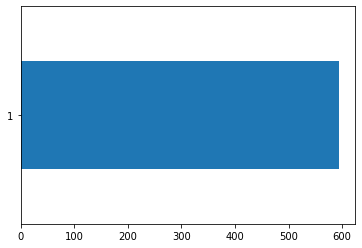

In [96]:
## Apa ada proses verifikasi
## Tidak, hanya perlu menggunakan foto KTP dan KK	Ya, ada proses verifikasi. Mohon jelaskan

Verifikasi = CleanColumn(df, 3, 587).value_counts(sort = False).drop(3)
Verifikasi.plot(kind = 'barh')

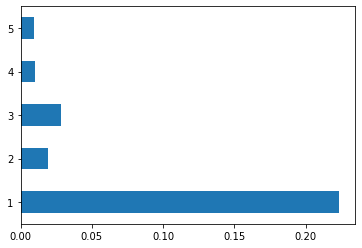

In [97]:
## Apakah Anda pernah mengalami masalah selama mengajukan pinjaman melalui jasaÂ fintechÂ lending? Jika pernah, mohon sebutkan!
## Tidak pernah mengalami masalah	Aplikasi/ web tidak dapat / sulit diakses	BungaÂ tinggi	Penagihan dilakukan kepada pihak selain peminjam yang bersangkutan	Teror oleh debt collector	Lainnya, Mohon sebutkan !

Masalah = CleanMultiple(df, 6, 589)
Masalah.plot(kind = 'barh')

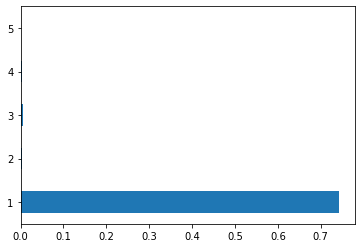

In [98]:
## Apakah Anda menggunakan fintech market provisioning berikut untuk membandingkan beberapa layanan?
## Tidak pernah menggunakan	Cekaja	Cermati	HaloMoney	KreditGogo	lainnya, sebutkan

MarketProv = CleanMultiple(df, 6, 595)
MarketProv.plot(kind = 'barh')

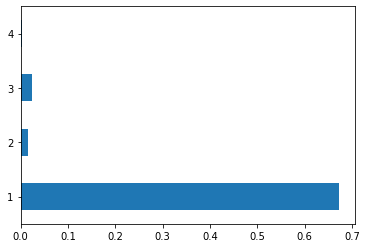

In [99]:
## Apakah Anda pernah mengï»¿gunakan fintech untuk investasi berikut?
## Tidak pernah menggunakan	Bareksa	Bibitnomic	LiveOlive	Lainnya, sebutkan

Invest = CleanMultiple(df, 5, 601)
Invest.plot(kind = 'barh')

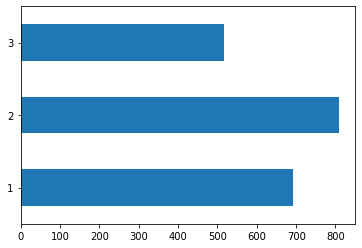

In [100]:
## Apakah Anda mengetahui terdapat regulasi OJK/ BI yang mengatur mengenai keberadaan fintech?
## Ya Tahu	Tidak Tahu

Regulasi = CleanColumn(df, 3, 606).value_counts(sort = (False))
Regulasi.plot(kind = 'barh')

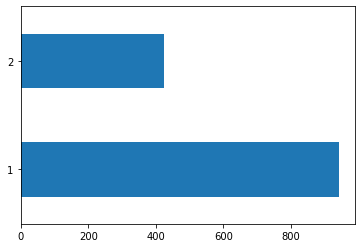

In [101]:
## Apakah status fintech yang terdaftar dan diawasi oleh OJK/BI menjadi salah satu pertimbangan penting bagi Anda untuk menggunakan layanan Fintech tersebut?
## Ya	Tidak

Status = CleanColumn(df, 3, 608).value_counts(sort = False).drop(3)
Status.plot(kind = 'barh')

## Peningkatan aktivitas di internet

In [324]:
## Selang kepercayaan peningkatan aktivitas 

A = AktifOnline.value_counts(sort = False).drop(4) 

n = A.sum()
p = A[1]/n
n30 = 30
n100 = 100

A30 = AktifOnline.sample(n=n30,random_state=2).value_counts(sort=False).drop(4)
A100 = AktifOnline.sample(n=n100,random_state=2).value_counts(sort=False).drop(4)

p30 = A30[1]/n30
p100 = A100[1]/n100

SelangTunggal(n30, p30, 0.05), SelangTunggal(n100, p100, 0.05), SelangTunggal(n, p, 0.05)

((0.5750910492850393, 0.8915756173816273),
 (0.710169052470038, 0.869830947529962),
 (0.8568153754710663, 0.8875372416088234))

((47.487490334505594, 1.6448536269514722, True), 1815, 0.8721763085399449)

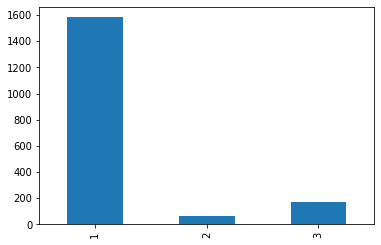

In [385]:
## Uji Hipotesis: Kebanyakan orang online lebih sering dalam 3 bulan terakhir
## H0: p = po = 0.5
## H1: p > po
## Jumlah data mengabaikan NaN
## 1: Lebih, 2: Kurang, 3: Sama
A = AktifOnline.value_counts(sort = False).drop(4) 
n = A.sum()
p = A[1]/n
po = 0.5
alfa = 0.05
A.plot(kind = 'bar')
UjiProporsiBesar(n, p, po, alfa, '>'), n, p

## Apakah kebanyakan orang online lebih dari 8 jam dalam 3 bulan terakhir

In [325]:
## Selang kepercayaan online lebih dari 8 jam

dfJamOn = pd.DataFrame({'Jumlah': JamOn,'Jam Online': Jam}).set_index('Jam Online')

JamOnline30 = JamOnline.drop(10).sample(n = 30, random_state = 1)['Jam Online'].value_counts(sort = False)
JamOnline100 = JamOnline.drop(10).sample(n = 100, random_state = 1)['Jam Online'].value_counts(sort = False)

n = JamOn.sum()
p = JamOn[9]/(JamOn.sum())
p30 = JamOnline30[9]/30
p100 = JamOnline100[9]/100

SelangTunggal(30, p30, 0.05), SelangTunggal(100, p100, 0.05), SelangTunggal(n, p, 0.05)

((0.2560114457146738, 0.6106552209519929),
 (0.4423158983733576, 0.6376841016266425),
 (0.5914892975570271, 0.6363099302422007))

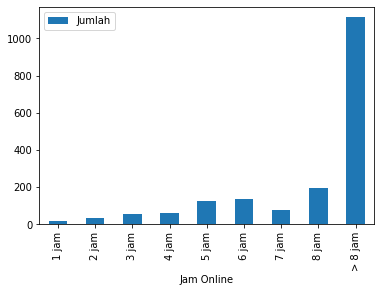

In [389]:
## Uji Hipotesis: Apakah kebanyakan orang online lebih dari 8 jam dalam 3 bulan terakhir
## H0: p = po = 0.5
## H1: p > po
## Jumlah data mengabaikan NaN
p = JamOn[9]/(JamOn.sum())
UjiProporsiBesar((JamOn.sum()), JamOn[9]/(JamOn.sum()), 0.5, 0.05, '>')
dfJamOn.plot(kind = 'bar')

## Jumlah pelajar yang online melebihi 8 jam lebih banyak dari pegawai/non pelajar

In [326]:
## Selang kepercayaan persen pelajar

Pekerjaan30 = dfPekerjaan.sample(n = 30, random_state = 1)
Pekerjaan100 = dfPekerjaan.sample(n = 100, random_state = 1)
n = dfPekerjaan['Pekerjaan'].value_counts(sort = False).sum()
p = dfPekerjaan['Pekerjaan'].value_counts(sort = False)[1]/n
p30 = Pekerjaan30['Pekerjaan'].value_counts(sort = False)[1]/30
p100 = Pekerjaan100['Pekerjaan'].value_counts(sort = False)[1]/100

SelangTunggal(30, p30, 0.05), SelangTunggal(100, p100, 0.05), SelangTunggal(n, p, 0.05)

((0.6153178091501779, 0.9180155241831556),
 (0.6762932446636111, 0.843706755336389),
 (0.7585724668927742, 0.7948928796418793))

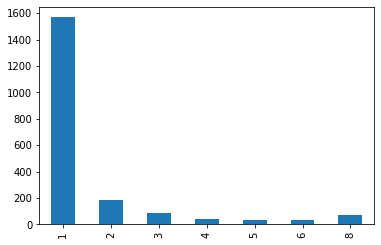

In [125]:
## Pelajar / Mahasiswa	Karyawan Swasta	Ibu Rumah Tangga	Pegawai Negeri	Profesi ( Dokter, Dosen, Pengacara, dll)	Pengusaha	Lainnya, sebutkan
## 1 jam	2 jam	3 jam	4 jam	5 jam	6 jam	7 jam	8 jam	> 8 jam

Profesi = ['Pelajar / Mahasiswa',
           'Karyawan Swasta',
           'Ibu Rumah Tangga',
           'Pegawai Negeri',
           'Profesi ( Dokter, Dosen, Pengacara, dll)',
           'Pengusaha',
           'Lainnya, sebutkan']
Jam = ['1 jam',
       '2 jam',
       '3 jam',
       '4 jam',
       '5 jam',
       '6 jam',
       '7 jam',
       '8 jam',
       '> 8 jam']
dfPekerjaan = pd.DataFrame({'Pekerjaan': Pekerjaan})
## JumlahPekerjaan = Pekerjaan.groupby(['Pekerjaan']).size().reset_index(name='counts')
JumlahPekerjaan = dfPekerjaan['Pekerjaan'].value_counts(sort = False)
JumlahPekerjaan.plot(kind = 'bar')

In [105]:
## Online Internet berdasarkan pekerjaan
OnlineKerja = pd.DataFrame({'Pekerjaan': Pekerjaan, 'Jam Online': JamOnline['Jam Online'],'count': 1})
OnlineKerja

,Pekerjaan,Jam Online,count
0,2,9,1
1,1,7,1
2,1,9,1
3,1,10,1
4,1,9,1
...,...,...,...
2015,1,10,1
2016,8,10,1
2017,5,8,1
2018,3,10,1


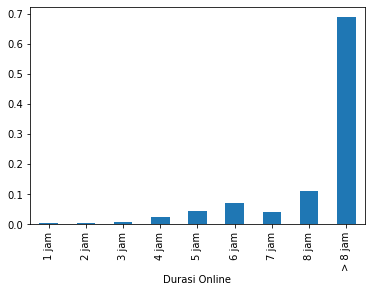

In [106]:
## Jam online pelajar

OnlinePelajar = pd.DataFrame(OnlineKerja.loc[OnlineKerja['Pekerjaan'] == 1].groupby(['Jam Online']).count()['count'])
OnlinePelajar = OnlinePelajar.drop(10)

## Persentase jam online pelajar

OnlinePelajar['Durasi Online'] = Jam
OnlinePelajar = OnlinePelajar.set_index('Durasi Online')

OnlinePelajar['persen'] = OnlinePelajar/OnlinePelajar['count'].sum()
OnlinePelajar['persen'].plot(kind = 'bar')

,count,persen
Durasi Online,,
1 jam,5,0.003484
2 jam,9,0.006272
3 jam,12,0.008362
4 jam,35,0.024390
5 jam,66,0.045993
6 jam,102,0.071080
7 jam,61,0.042509
8 jam,158,0.110105
> 8 jam,987,0.687805


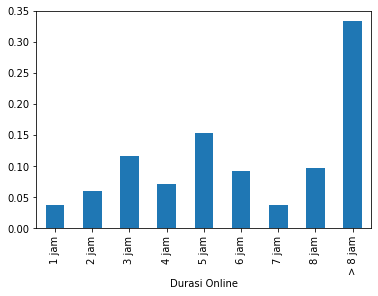

In [107]:
## Jam online selain pelajar

OnlinePekerja = pd.DataFrame(OnlineKerja.loc[OnlineKerja['Pekerjaan'] != 1].groupby(['Jam Online']).count()['count'])
OnlinePekerja = OnlinePekerja.drop(10)

## Persentase 

OnlinePekerja['persen'] = OnlinePekerja['count']/OnlinePekerja['count'].sum()

OnlinePekerja['Durasi Online'] = Jam
OnlinePekerja = OnlinePekerja.set_index('Durasi Online')

OnlinePekerja['persen'].plot(kind = 'bar')

OnlinePekerja 
OnlinePelajar

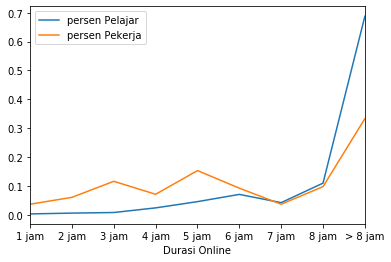

In [108]:
dfOnline = OnlinePelajar.merge(OnlinePekerja, left_on = 'Durasi Online', right_on = 'Durasi Online')
dfOnline = dfOnline.rename(columns = {'count_x': 'count Pelajar', 'persen_x': 'persen Pelajar', 'count_y': 'count Pekerja', 'persen_y': 'persen Pekerja'})

dfOnline.loc[:, ['persen Pelajar', 'persen Pekerja']].plot()

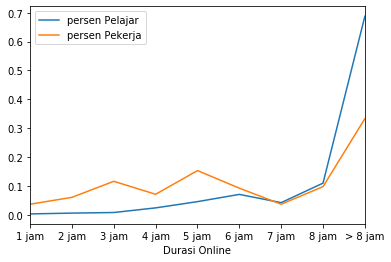

In [390]:
## Uji Hipotesis: Lebih banyak pelajar online lebih dari 8 jam dari pada non pelajar (di formula tertulis pekerja)
## H0: p1-p2 = 0
## H1: p1-p2 > 0
## Jumlah data mengabaikan NaN
n1 = OnlinePelajar['count'].sum()
n2 = OnlinePekerja['count'].sum()
p1 = OnlinePelajar.loc['> 8 jam', 'count']/n1
p2 = OnlinePekerja.loc['> 8 jam', 'count']/n2
UjiDuaProporsi(n1, n2, p1, p2, 0, 0.01, '>')
dfOnline.loc[:, ['persen Pelajar', 'persen Pekerja']].plot()

## Gopay vs OVO

In [330]:
## Selang kepercayaan pengguna emoney gopay - ovo
Emoney500 = CleanMultiple(df.sample(500), 13, 348)
Emoney1000 = CleanMultiple(df.sample(1000), 13, 348)

n = 2020*(1 - Emoney[1])
p1 = Emoney[2]
p2 = Emoney[3]
p5001 = Emoney500[2]
p5002 = Emoney500[3]
p10001 = Emoney1000[2]
p10002 = Emoney1000[3]

SelangGanda(500, 500, p5001, p5002, 0.05), SelangGanda(1000, 1000, p10001, p10002, 0.05),  SelangGanda(n, n, p1, p2, 0.05)

((-0.0063401580231099985, 0.1143401580231101),
 (0.03058613483261694, 0.1154138651673832),
 (0.047526406322075256, 0.10982144127812268))

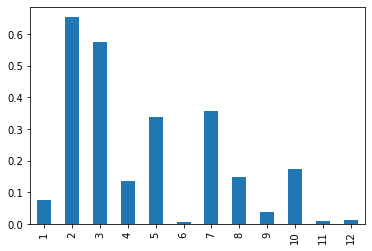

In [110]:
## Penggunaan E-money
## Tidak Menggunakan eMoney	GoPay	OVO	LinkAja	Dana	Paytren	ShopeePay	Flazz BCA	Brizzi	eMoney Mandiri	JakCard	iSaku	Lainnya, mohon sebutkan

Emoney = CleanMultiple(df, 13, 348)

EmoneyU = CleanMultipleUn(df, 13, 348)

Emoney.plot(kind = 'bar')

In [397]:
## Uji Hipotesis: Pengguna Gopay lebih banyak dari OVO
## H0: p1-p2 = 0
## H1: p1-p2 > 0
## Tidak Menggunakan eMoney	GoPay	OVO	LinkAja	Dana	Paytren	ShopeePay	Flazz BCA	Brizzi	eMoney Mandiri	JakCard	iSaku	Lainnya, mohon sebutkan

BrandEmoney = ['Tidak Menggunakan eMoney',
               'GoPay',
               'OVO',
               'LinkAja',
               'Dana',
               'Paytren',
               'ShopeePay',
               'Flazz BCA',
               'Brizzi',
               'eMoney Mandiri',
               'JakCard',
               'iSaku']
dfEmoney = pd.DataFrame({'Persen Pengguna': Emoney, 'Brand': BrandEmoney}).set_index('Brand')
n1 = 2020*(1 - Emoney[1])
n2 = 2020*(1 - Emoney[1])
p1 = Emoney[2]
p2 = Emoney[3]
UjiDuaProporsi(n1, n2, p1, p2, 0, 0.01, '>')

(4.9343806710317715, 2.3263478740408408, True)

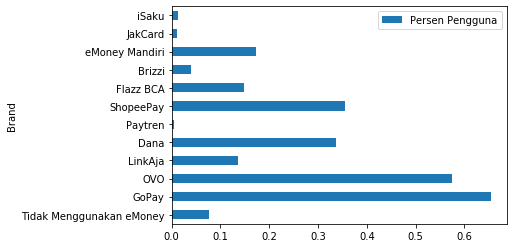

In [398]:
dfEmoney.plot(kind = 'barh')

## Fintech

In [332]:
## Selang kepercayaan pengenalan fintech

KenalFintech30 = CleanColumn(df, 3, 539).sample(30).value_counts(sort = False, normalize = False).drop(3)
KenalFintech100 = CleanColumn(df, 3, 539).sample(100).value_counts(sort = False, normalize = False).drop(3)

n = KenalFintech.sum()
p = p = KenalFintech[1]/n
p30 = KenalFintech30[1]/30
p100 = KenalFintech100[1]/100

SelangTunggal(30, p30, 0.05), SelangTunggal(100, p100, 0.05), SelangTunggal(n, p, 0.05)

((0.2560114457146738, 0.6106552209519929),
 (0.24715478691048412, 0.43284521308951596),
 (0.4861451880449972, 0.5349204872957711))

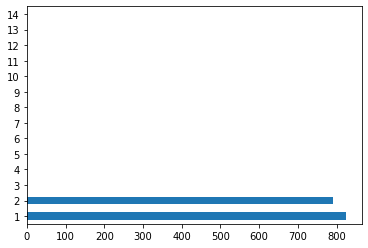

In [126]:
## Mengenal fintech 
## Ya Tahu	Tidak Tahu

KenalFintech = CleanColumn(df, 3, 539).value_counts(sort = False, normalize = False).drop(3)
KenalFintech.plot(kind = 'barh')


## Fintech yang pernah digunakan
## Tidak pernah menggunakan fintech lending	Danamas	Koinworks	Amartha	Investree	Modalku	Danacepat	Akseleran	Akulaku	CIcil	Uangteman	Taralite	Kredivo	AwanTunai	Crowdo	Lainnya, mohon sebutkan

Fint = CleanMultiple(df, 15, 542)
Fint.plot(kind = 'barh')

In [113]:
## Uji Hipotesis: Apakah kebanyakan orang sudah mengenal fintech
## H0: p1 = 0.5
## H1: p1 > 0.5

n = KenalFintech.sum()
p = KenalFintech[1]/n

UjiProporsiBesar(n, p, 0.5, 0.05, '>')

(0.8464933196132941, 1.6448536269514722, False)

## Preferensi untuk menggunakan M-banking

,Cek Saldo,Mutasi,Transfer Sama Bank,Transfer Antar Bank,Beli Pulsa,Bayar Tagihan
Preferensi,,,,,,
ATM,327,258,334,357,294,322
E-Banking,187,174,184,183,201,199
M-Banking,1156,895,1149,1122,1164,1103
SMS Banking,20,19,19,17,21,10
Kantor Cabang,16,360,20,27,26,72


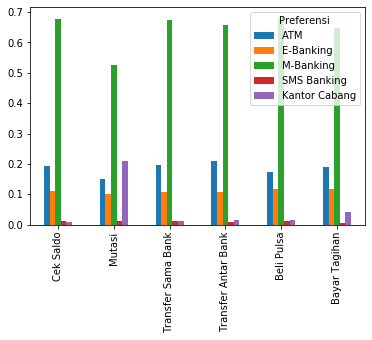

In [132]:
Lay = ['ATM', 
        'E-Banking', 
        'M-Banking', 
        'SMS Banking', 
        'Kantor Cabang',
        'NaN']

LayMenarik = pd.DataFrame({'Cek Saldo': CekSaldo, 
                           'Mutasi': Mutasi, 
                           'Transfer Sama Bank': Transfer1, 
                           'Transfer Antar Bank': Transfer2, 
                           'Beli Pulsa': Pulsa, 
                           'Bayar Tagihan': Tagihan,
                          'Preferensi': Lay}).set_index('Preferensi').drop('NaN')

NormLayMenarik = (LayMenarik/LayMenarik.sum())
NormLayMenarik.T.plot(kind = 'bar')
LayMenarik

In [362]:
## Selang kepercayaan M-banking transfer sama bank

Transfer130 = CleanColumn(df, 6, 284).sample(30).value_counts(sort = False)
Transfer1100 = CleanColumn(df, 6, 284).sample(100).value_counts(sort = False)

n = Transfer1.sum()
p = Transfer1[3]/n

p30 = Transfer130[3]/30
p100 = Transfer1100[3]/100

SelangTunggal(30, p30, 0.05), SelangTunggal(100, p100, 0.05),  SelangTunggal(n, p, 0.05)

((0.5360176480688885, 0.8639823519311114),
 (0.5248660051214322, 0.7151339948785678),
 (0.5472150452723541, 0.5904087171038834))

(15.282472133014908, 2.3263478740408408, True)

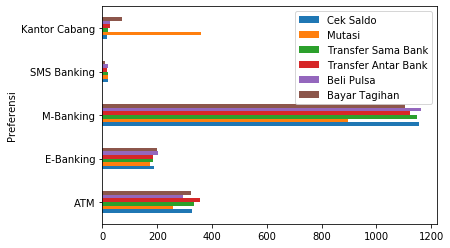

In [159]:
## Uji Hipotesis: Kebanyakan orang menggunakan M-Banking untuk transfer 
## H0: p1 = 0.5
## H1: p1 > 0.5

## Transfer Sama Bank

n = LayMenarik.sum()['Transfer Sama Bank']
p = LayMenarik.loc['M-Banking', 'Transfer Sama Bank']/n

LayMenarik.plot(kind = 'barh')

UjiProporsiBesar(n, p, 0.5, 0.01, '>')

In [361]:
## Selang kepercayaan M-banking transfer antar bank

Transfer230 = CleanColumn(df, 6, 289).sample(30).value_counts(sort = False)
Transfer2100 = CleanColumn(df, 6, 289).sample(100).value_counts(sort = False)

n = Transfer1.sum()
p = Transfer1[3]/n
p30 = Transfer230[3]/30
p100 = Transfer2100[3]/100

SelangTunggal(30, p30, 0.05), SelangTunggal(100, p100, 0.05),  SelangTunggal(n, p, 0.05)

((0.38934477904800713, 0.7439885542853262),
 (0.4220802307169153, 0.6179197692830847),
 (0.5472150452723541, 0.5904087171038834))

In [138]:
## Transfer Antar Bank

n = LayMenarik.sum()['Transfer Antar Bank']
p = LayMenarik.loc['M-Banking', 'Transfer Antar Bank']/n

UjiProporsiBesar(n, p, 0.5, 0.05, '>')

(13.72584029460605, 1.6448536269514722, True)

1519.247897080653

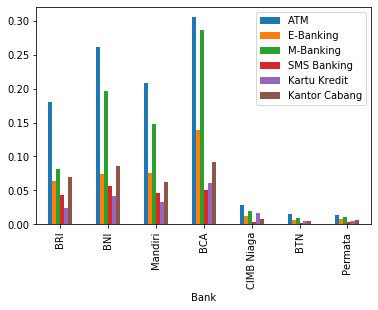

In [199]:
## Layanan M-banking terfavorit

Bank = ['BRI', 'BNI', 'Mandiri', 'BCA', 'CIMB Niaga', 'BTN', 'Permata', 'NaN']
Layanan = pd.DataFrame({'ATM': LayATM, 
                        'E-Banking': LayEbank, 
                        'M-Banking': LayMbank, 
                        'SMS Banking': LaySMSbank, 
                        'Kartu Kredit': LayKredit, 
                        'Kantor Cabang': LayKanCab,
                        'Bank': Bank}).set_index('Bank').drop('NaN')
Layanan.plot(kind = 'bar')
LayMbank.sum()*2020

In [189]:
## Uji Hipotesis: Pengguna M-banking BCA lebih banyak dari BNI
## H0: p1-p2 = 0
## H1: p1-p2 > 0

n1 = int(LayMbank.sum()*2020)
n2 = n1

p1 = LayMbank[4]
p2 = LayMbank[2]

UjiDuaProporsi(n1, n2, p1, p2, 0, 0.01, '>')

(5.832916758386031, 2.3263478740408408, True)

 ## QR Code

In [338]:
## Selang kepercayaan pengguna QR code

QRcode30 = CleanColumn(df.sample(30), 3, 408).value_counts(sort = False)
QRcode100 = CleanColumn(df.sample(100), 3, 408).value_counts(sort = False)

n = QRcode.drop(3).sum()
p = QRcode[1]/n

p30 = QRcode30[1]/30
p100 = QRcode100[1]/100

SelangTunggal(30, p30, 0.05), SelangTunggal(100, p100, 0.05),  SelangTunggal(n, p, 0.05)

((0.4246954918846837, 0.7753045081153163),
 (0.5778400007999419, 0.7621599992000582),
 (0.7242034420333288, 0.7659458116980145))

(4.232852422273375, 2.3263478740408408, True)

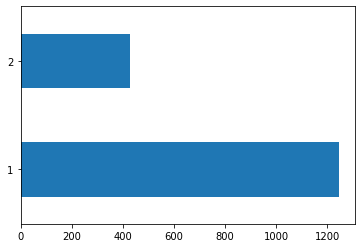

In [335]:
## Uji Hipotesis: Lebih dari 70% orang sudah pernah menggunakan pembayaran dengan QR code
## H0: p1 = 0.7
## H1: p1 > 0.7

## Pernah melakukan pembayaran menggunakan QR code
## Pernah - Tidak pernah

QRcode = CleanColumn(df, 3, 408).value_counts(sort = False)
QRcode.drop(3).plot(kind = 'barh')

n = QRcode.drop(3).sum()
p = QRcode[1]/n

UjiProporsiBesar(n, p, 0.7, 0.01, '>')

In [380]:
LayananQR30 = CleanMultiple(df.sample(30), 5, 410)

In [373]:
LayananQR100 = CleanMultiple(df.sample(100), 5, 410)

In [383]:
## Selang kepercayaan pengguna QR gopay

n = QRcode[1]*QRcode.drop(3).sum()
p = LayananQR[1]
p30 = LayananQR30[1]
p100 = LayananQR100[1]

SelangTunggal(30, p30, 0.05), SelangTunggal(100, p100, 0.05),  SelangTunggal(n, p, 0.05)

((0.32108058562828434, 0.6789194143717157),
 (0.3039817664728938, 0.4960182335271062),
 (0.5282694002249324, 0.5296227323826876))

(3.7517838202286367, 2.3263478740408408, True)

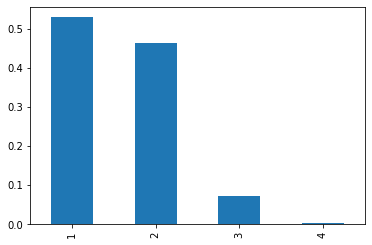

In [157]:
## Uji Hipotesis: Pengguna QR Gopay lebih banyak dari OVO
## H0: p1-p2 = 0
## H1: p1-p2 > 0

## Pernah menggunakan layanan QR code apa
## GoPay	OVO	LinkAja	Paytren	Lainnya, sebutkan

LayananQR = CleanMultiple(df, 5, 410)
LayananQR.plot(kind ='bar')

n1 = n
n2 = n

p1 = LayananQR[1]
p2 = LayananQR[2]

UjiDuaProporsi(n1, n2, p1, p2, 0, 0.01, '>')

## Top Up E-money

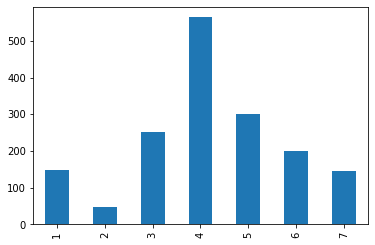

In [173]:
## Nominal Top Up
## Tidak menggunakan eMoney	< Rp 25.000,-	Rp 25.000-Rp 50.000,-	Rp 50.001-Rp 100.000	Rp 100.001-Rp 150.000	Rp 150.001 â€“ Rp 300.000	> Rp 300.000

NominalTopUp = CleanColumn(df, 8, 389).value_counts(sort = False)
NominalTopUp.drop(8).plot(kind = 'bar')


In [359]:
## Selang kepercayaan top up

n = NominalTopUp.drop(8).drop(1).sum()
p = (NominalTopUp[4]+NominalTopUp[3]+NominalTopUp[2])/n

NominalTopUp30 = CleanColumn(df, 8, 389).sample(30).value_counts(sort = False)
NominalTopUp100 = CleanColumn(df, 8, 389).sample(100).value_counts(sort = False)

p30 = (NominalTopUp30[4]+NominalTopUp30[3]+NominalTopUp30[2])/30
p100 = (NominalTopUp100[4]+NominalTopUp100[3]+NominalTopUp100[2])/100

p30, p100

(0.36666666666666664, 0.34)

In [360]:
SelangTunggal(30, p30, 0.05), SelangTunggal(100, p100, 0.05),  SelangTunggal(n, p, 0.05)

((0.19422613547627365, 0.5391071978570596),
 (0.24715478691048412, 0.43284521308951596),
 (0.5468573332500248, 0.5967561677426951))

In [354]:
## Uji Hipotesis: Kebanyakan orang melakukan top up emoney kurang/sama dengan Rp100.000,-
## H0: p1 = 0.5
## H1: p1 > 0.5

n = NominalTopUp.drop(8).drop(1).sum()
p = (NominalTopUp[4]+NominalTopUp[3]+NominalTopUp[2])/n

UjiProporsiBesar(n, p, 0.5, 0.01, '>')

(5.640959202780269, 2.3263478740408408, True)